# Weather Prediction Using Time Series Analysis

Perform By-

1)Aishwarya Sonawane

'''
Business Objective-
Predict and utilize accurate weather forecasts for effective decision-making across various industries.

Minimize -
1] Operational Costs: Minimize operational costs by efficiently allocating resources, optimizing energy consumption, 
and reducing unnecessary expenditures in response to accurate weather predictions.

2] Environmental Impact: Minimize the environmental impact by optimizing resource usage in industries such as energy, 
transportation.

Maximize- 
1] Energy Efficiency: Maximize energy efficiency by optimizing energy production and distribution, aligning with 
forecasted weather conditions for renewable and non-renewable energy sources.

2] Public Health Preparedness: Maximize public health by leveraging weather predictions for early detection and 
management of weather-related health risks, improving resource allocation and emergency preparedness.

Constrains-
1] Data Accuracy: Ensure data accuracy and reliability in weather predictions to enhance the effectiveness 
of decision-making processes.

2] Technological Infrastructure: Address constraints related to the technological infrastructure required for 
collecting, processing, and disseminating accurate weather data.
   
Data Dictionary-
Feature          Description                  Data Type           Relevance
date             Date of observation          Date                Temporal aspect of weather
precipitation    Amount of precipitation      Float               Level of rainfall
temp_max         Maximum temperature          Float               Highest temperature
temp_min         Minimum temperature          Float               Lowest temperature
wind             Wind speed                   Float               Wind intensity
weather          Description of weather       String              Qualitative weather info
                 conditions
'''

In [1]:
# Load the library
import sweetviz as sv  #generates beautiful, high-density visualizations to kickstart EDA with 2 code lines.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # tsa = Time series
#Time series decomposition for trend, seasonality, and residual analysis

In [2]:
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = 'C:/Final Project/seattle-weather.csv'
df = pd.read_csv('C:/Final Project/seattle-weather.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df= pd.read_csv('C:/Final Project/seattle-weather.csv')
df



Date  precipitation  temp_max  temp_min  wind  weather
0       1/1/2012            0.0      12.8       5.0   4.7  drizzle
1       1/2/2012           10.9      10.6       2.8   4.5     rain
2       1/3/2012            0.8      11.7       7.2   2.3     rain
3       1/4/2012           20.3      12.2       5.6   4.7     rain
4       1/5/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  12/27/2015            8.6       4.4       1.7   2.9     rain
1457  12/28/2015            1.5       5.0       1.7   1.3     rain
1458  12/29/2015            0.0       7.2       0.6   2.6      fog
1459  12/30/2015            0.0       5.6      -1.0   3.4      sun
1460  12/31/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [5]:
df.columns

Index(['Date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [6]:
#show 1st five rows
df.head()

Date  precipitation  temp_max  temp_min  wind  weather
0  1/1/2012            0.0      12.8       5.0   4.7  drizzle
1  1/2/2012           10.9      10.6       2.8   4.5     rain
2  1/3/2012            0.8      11.7       7.2   2.3     rain
3  1/4/2012           20.3      12.2       5.6   4.7     rain
4  1/5/2012            1.3       8.9       2.8   6.1     rain

In [7]:
#check data types 
df.dtypes   

Date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [8]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

In [9]:
# Set the 'Date' column as the index
df = df.set_index('Date')


In [10]:
file_path = 'C:/Final Project/seattle-weather.csv'
df = pd.read_csv('C:/Final Project/seattle-weather.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
import pandas as pd

# Assuming your DataFrame 'df' has a column named 'date' with datetime values
print(df.columns)  # Print the column names to verify the presence of 'date'

# If 'date' column is present, set it as the index
if 'date' in df.columns:
    df = df.set_index('date')
else:
    print("The 'date' column is not present in the DataFrame.")

# If the index is not already a DatetimeIndex, convert it
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Now you can access the day, month, and year components
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

print(df.head())

Index(['Date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
The 'date' column is not present in the DataFrame.
                                    Date  precipitation  temp_max  temp_min  \
1970-01-01 00:00:00.000000000 2012-01-01            0.0      12.8       5.0   
1970-01-01 00:00:00.000000001 2012-01-02           10.9      10.6       2.8   
1970-01-01 00:00:00.000000002 2012-01-03            0.8      11.7       7.2   
1970-01-01 00:00:00.000000003 2012-01-04           20.3      12.2       5.6   
1970-01-01 00:00:00.000000004 2012-01-05            1.3       8.9       2.8   

                               wind  weather  day  month  year  
1970-01-01 00:00:00.000000000   4.7  drizzle    1      1  1970  
1970-01-01 00:00:00.000000001   4.5     rain    1      1  1970  
1970-01-01 00:00:00.000000002   2.3     rain    1      1  1970  
1970-01-01 00:00:00.000000003   4.7     rain    1      1  1970  
1970-01-01 00:00:00.000000004   6.1     rain    1      1 

In [12]:
# df.drop(['Month','Year','Weekday Name'],axis=1,inplace=True)
df.dtypes


Date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
day                       int64
month                     int64
year                      int64
dtype: object

In [28]:
"""MinMaxScaler is a preprocessing technique provided by  sklearn
to scale features to a specified range, usually between 0 and 1"""

from sklearn.preprocessing  import MinMaxScaler

In [29]:
# Instantiate the MinMaxScaler

scaler=MinMaxScaler()

#MinMaxScaler is used to scale the features in the DataFrame 

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = df.columns.drop(numerical_cols)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
X_numerical = df[numerical_cols]
X_numerical_normalized = scaler.fit_transform(X_numerical)

# Create a new DataFrame with the normalized numerical columns and the original non-numerical columns
X_normalized = pd.DataFrame(X_numerical_normalized, columns=numerical_cols)
X_normalized = pd.concat([X_normalized, df[non_numerical_cols]], axis=1)

In [8]:
X_normalized

precipitation  temp_max  temp_min      wind        Date  weather
0          0.000000  0.387097  0.476378  0.472527    1/1/2012  drizzle
1          0.194991  0.327957  0.389764  0.450549    1/2/2012     rain
2          0.014311  0.357527  0.562992  0.208791    1/3/2012     rain
3          0.363148  0.370968  0.500000  0.472527    1/4/2012     rain
4          0.023256  0.282258  0.389764  0.626374    1/5/2012     rain
...             ...       ...       ...       ...         ...      ...
1456       0.153846  0.161290  0.346457  0.274725  12/27/2015     rain
1457       0.026834  0.177419  0.346457  0.098901  12/28/2015     rain
1458       0.000000  0.236559  0.303150  0.241758  12/29/2015      fog
1459       0.000000  0.193548  0.240157  0.329670  12/30/2015      sun
1460       0.000000  0.193548  0.196850  0.340659  12/31/2015      sun

[1461 rows x 6 columns]

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate numerical and non-numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numerical_cols = df.columns.drop(numerical_cols)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform only the numerical columns
X_numerical = df[numerical_cols]
X_numerical_normalized = scaler.fit_transform(X_numerical)

# Create a new DataFrame with the normalized numerical columns and the original non-numerical columns
X_normalized = pd.DataFrame(X_numerical_normalized, columns=numerical_cols)
X_normalized = pd.concat([X_normalized, df[non_numerical_cols]], axis=1)

In [33]:
def EDA():
    #analyzing the dataset
    eda_report=sv.analyze(df)
    #display the report
    eda_report.show_html('eda.html')
    
'''EDA stands Exploratory data analysis.It is essential step in the data
analysis process where you visually and statically explore the main character of dataset
the goal of EDA togain insight into data,identify pattern'''
    

'EDA stands Exploratory data analysis.It is essential step in the data\nanalysis process where you visually and statically explore the main character of dataset\nthe goal of EDA togain insight into data,identify pattern'

<Axes: >

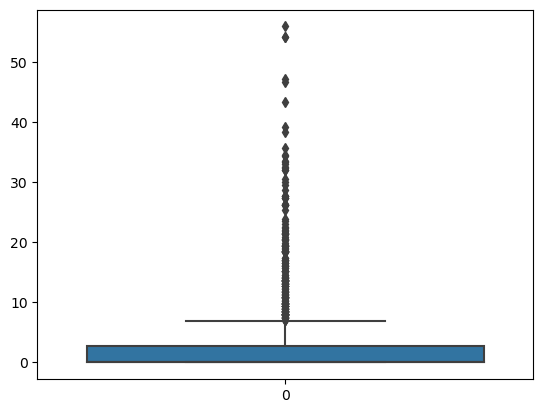

In [34]:
sns.boxplot(df.precipitation)

#Visualizes boxplots for 'precipitation', 'temp_max', 'temp_min', and 'wind' in the DataFrame df using Seaborn.


<Axes: >

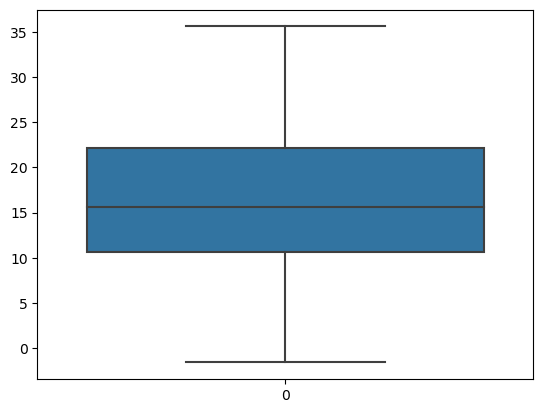

In [35]:
sns.boxplot(df.temp_max)


<Axes: >

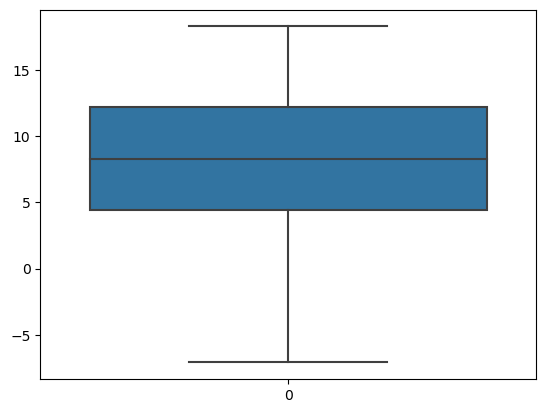

In [36]:
sns.boxplot(df.temp_min)


<Axes: >

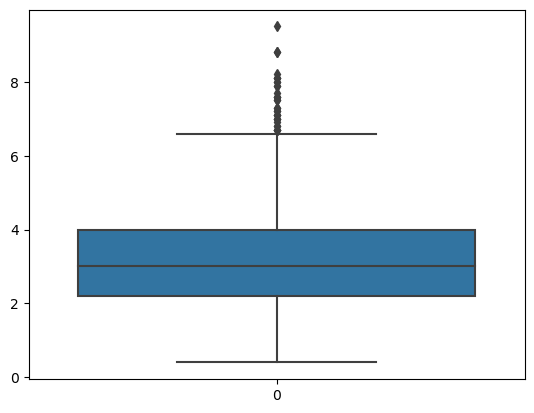

In [37]:

sns.boxplot(df.wind)

In [38]:
data_list = ['precipitation', 'temp_max', 'temp_min', 'wind']

In [39]:

data_list = ['precipitation', 'temp_max', 'temp_min', 'wind']

for data in data_list:
    IQR = df[data].quantile(0.75) - df[data].quantile(0.25)
    lower_limit = df[data].quantile(0.25) - (IQR * 1.5)
    if lower_limit < 0:
        lower_limit = 0.0
    upper_limit = df[data].quantile(0.75) + (IQR * 1.5)
    outliers_df = np.where((df[data] > upper_limit) | (df[data] < lower_limit), True, False)
    print(f'There are {outliers_df.sum()} outliers in {data} column.', '\n')
    
#Detects and prints the count of outliers for each column specified in the data_list using the IQR (Interquartile Range) method.

There are 206 outliers in precipitation column. 

There are 3 outliers in temp_max column. 

There are 72 outliers in temp_min column. 

There are 34 outliers in wind column. 



<Axes: >

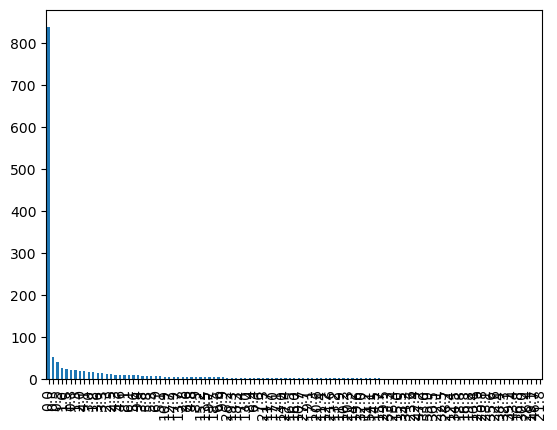

In [40]:
#Plots bar charts to visualize the distribution of values in 'precipitation', 'temp_max', 'temp_min', 'wind', and 'weather' columns 

df['precipitation'].value_counts().plot(kind='bar')


<Axes: >

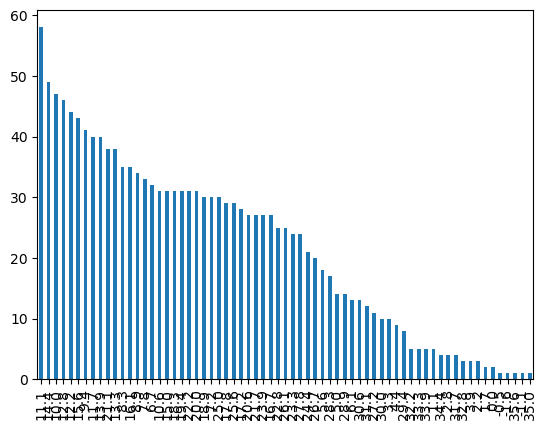

In [42]:
df['temp_max'].value_counts().plot(kind='bar')


<Axes: >

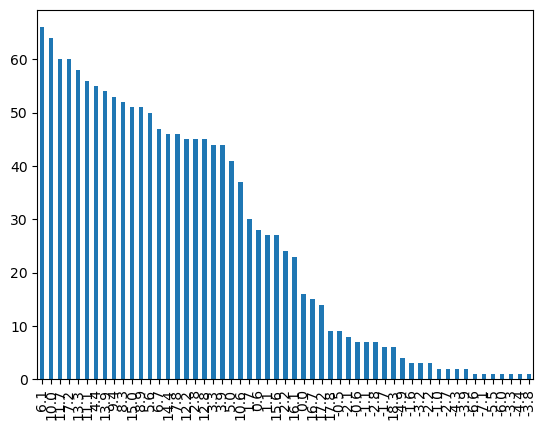

In [43]:
df['temp_min'].value_counts().plot(kind='bar')


<Axes: >

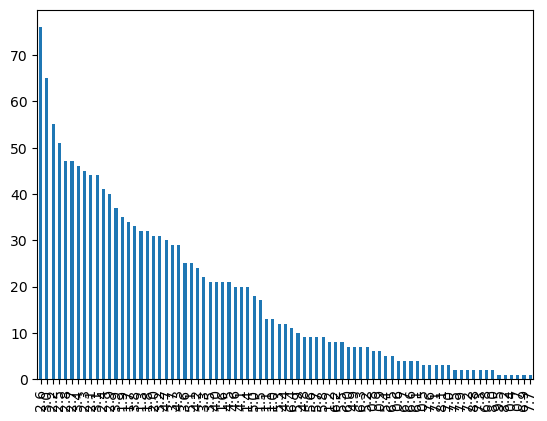

In [44]:
df['wind'].value_counts().plot(kind='bar')


<Axes: >

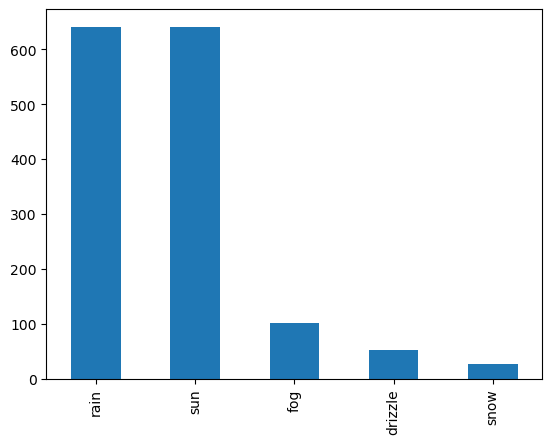

In [45]:

df['weather'].value_counts().plot(kind='bar')

In [46]:
 #Checking missing values 
df.isnull().sum()

Date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
day              0
month            0
year             0
dtype: int64

In [47]:
#Printing the number of times the value for each column
for weather in data_list:
    print(f'{df[(df[weather]==0)].shape[0]} times of {weather} is 0.', '\n')
    
#Counts and prints the occurrences of zero values for each weather-related column specified in data_list.    

838 times of precipitation is 0. 

2 times of temp_max is 0. 

16 times of temp_min is 0. 

0 times of wind is 0. 



In [48]:
df= pd.read_csv('C:/Final Project/seattle-weather.csv')
df


Date  precipitation  temp_max  temp_min  wind  weather
0       1/1/2012            0.0      12.8       5.0   4.7  drizzle
1       1/2/2012           10.9      10.6       2.8   4.5     rain
2       1/3/2012            0.8      11.7       7.2   2.3     rain
3       1/4/2012           20.3      12.2       5.6   4.7     rain
4       1/5/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  12/27/2015            8.6       4.4       1.7   2.9     rain
1457  12/28/2015            1.5       5.0       1.7   1.3     rain
1458  12/29/2015            0.0       7.2       0.6   2.6      fog
1459  12/30/2015            0.0       5.6      -1.0   3.4      sun
1460  12/31/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

<Axes: >

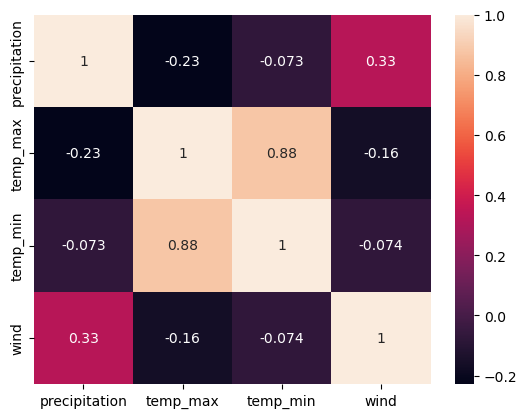

In [49]:
#Correlation Analysis
#Generates and displays a heatmap to visualize the correlation matrix of the DataFrame df using Seaborn. 
sns.heatmap(df.corr(),annot=True)

#We can see a strong negative correlation between temp_max.temp_min,wind,precipitation,day,month,year

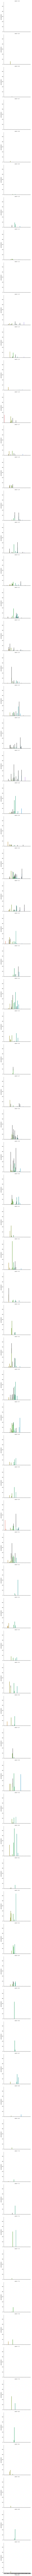

In [50]:
sns.catplot(data=df, x="temp_max", y="precipitation", row="wind", kind="bar")

#Creates separate categorical bar plots using Seaborn for the relationships between 'temp_max' and 'precipitation', 'temp_max' and 
#itself, and 'temp_max' and 'temp_min', with subplots based on the 'wind' variable.


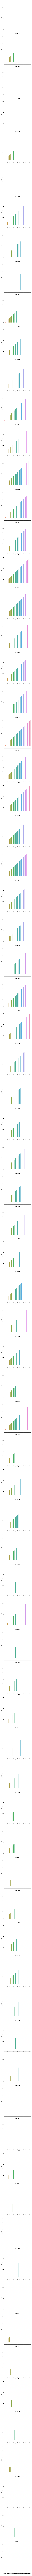

In [34]:
sns.catplot(data=df, x="temp_max", y="temp_max", row="wind", kind="bar")


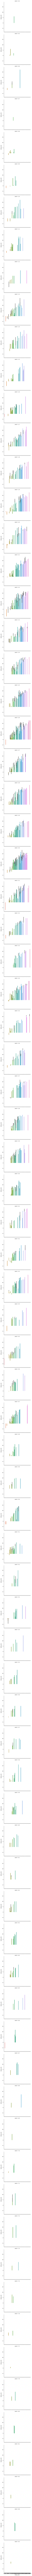

In [35]:
sns.catplot(data=df, x="temp_max", y="temp_min", row="wind", kind="bar")


In [36]:
pd.plotting.register_matplotlib_converters()

# used when plotting time-based data using Matplotlib
# these converters just make sure that for example datetime.datetime gets overwritten by pandas.Timestamp, allowing for compatibility with pandas. Maybe this will help: it seems that there is another method called deregister_matplotlib_converters


In [37]:
# Data Preparation: input should be float type

df.dtypes


Date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [9]:
# Assigning one weather from each category
weather_a = df.precipitation
weather_b = df.temp_max
weather_c = df.temp_min
weather_d = df.wind


In [10]:
df= pd.read_csv('C:/Final Project/seattle-weather.csv')
df

Date  precipitation  temp_max  temp_min  wind  weather
0       1/1/2012            0.0      12.8       5.0   4.7  drizzle
1       1/2/2012           10.9      10.6       2.8   4.5     rain
2       1/3/2012            0.8      11.7       7.2   2.3     rain
3       1/4/2012           20.3      12.2       5.6   4.7     rain
4       1/5/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  12/27/2015            8.6       4.4       1.7   2.9     rain
1457  12/28/2015            1.5       5.0       1.7   1.3     rain
1458  12/29/2015            0.0       7.2       0.6   2.6      fog
1459  12/30/2015            0.0       5.6      -1.0   3.4      sun
1460  12/31/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [53]:
df.columns

Index(['Date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [54]:
import pandas as pd

# Assuming your DataFrame 'df' has a column named 'date' with datetime values
print(df.columns)  # Print the column names to verify the presence of 'date'

# If 'date' column is present, set it as the index
if 'Date' in df.columns:
    df = df.set_index('Date')
else:
    print("The 'Date' column is not present in the DataFrame.")

# If the index is not already a DatetimeIndex, convert it
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Now you can access the day, month, and year components
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

print(df.head())

Index(['Date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')
            precipitation  temp_max  temp_min  wind  weather  day  month  year
Date                                                                          
2012-01-01            0.0      12.8       5.0   4.7  drizzle    1      1  2012
2012-01-02           10.9      10.6       2.8   4.5     rain    2      1  2012
2012-01-03            0.8      11.7       7.2   2.3     rain    3      1  2012
2012-01-04           20.3      12.2       5.6   4.7     rain    4      1  2012
2012-01-05            1.3       8.9       2.8   6.1     rain    5      1  2012


<Axes: xlabel='Date'>

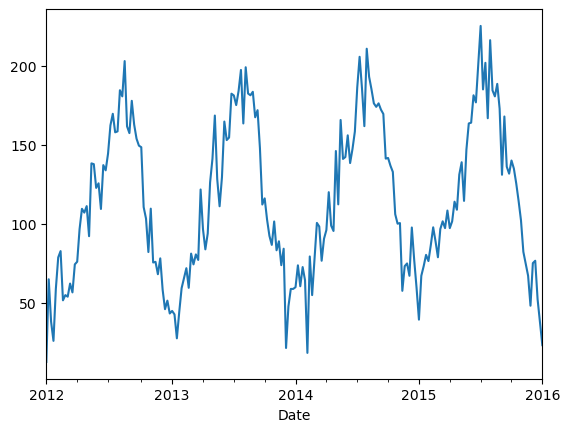

In [42]:
#Resamples the 'temp_max' data weekly and plots the sum using pandas' resample method.
weather_b = df['temp_max']
weather_b.resample('W').sum().plot()

<Axes: xlabel='Date'>

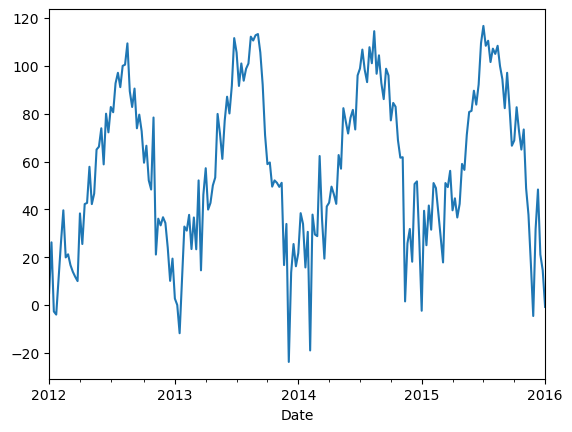

In [43]:
weather_c = df['temp_min']
weather_c.resample('W').sum().plot()
#values in sales_c is resampled by week

<Axes: xlabel='Date'>

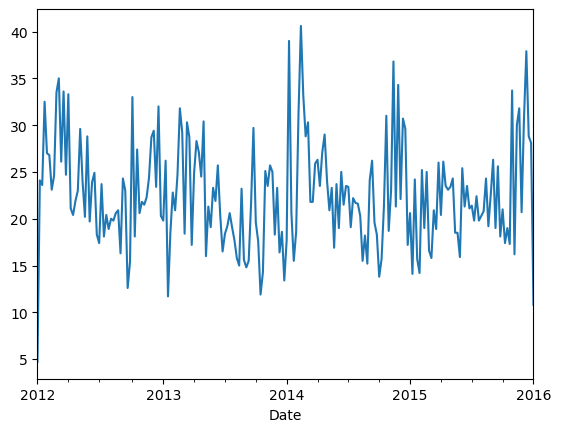

In [44]:
weather_d = df['wind']
weather_d.resample('W').sum().plot()
#Resamples the 'wind' data weekly and plots the sum using pandas' resample method.


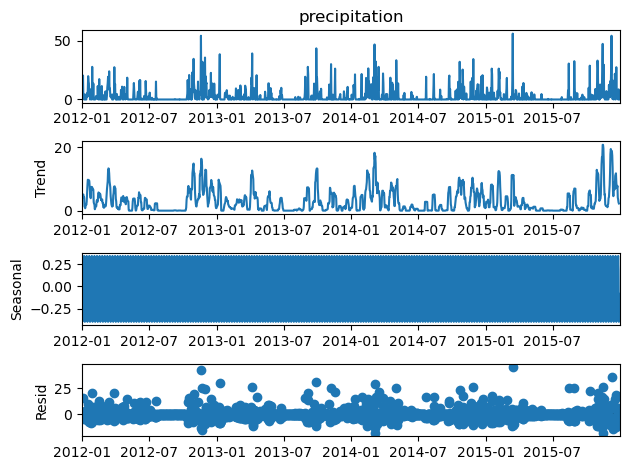

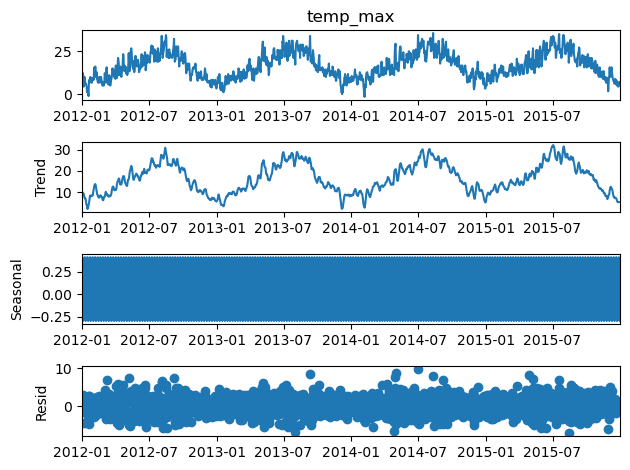

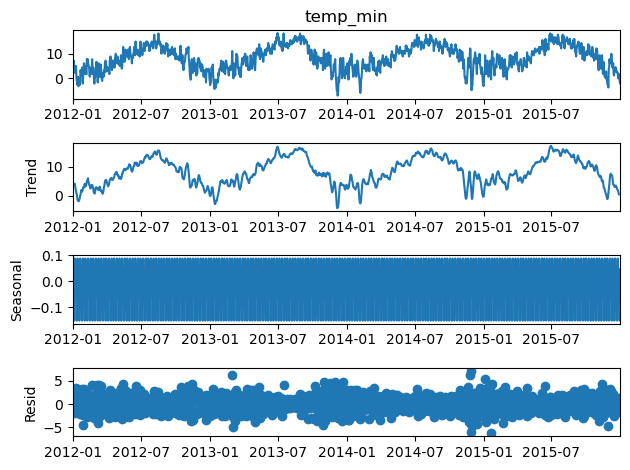

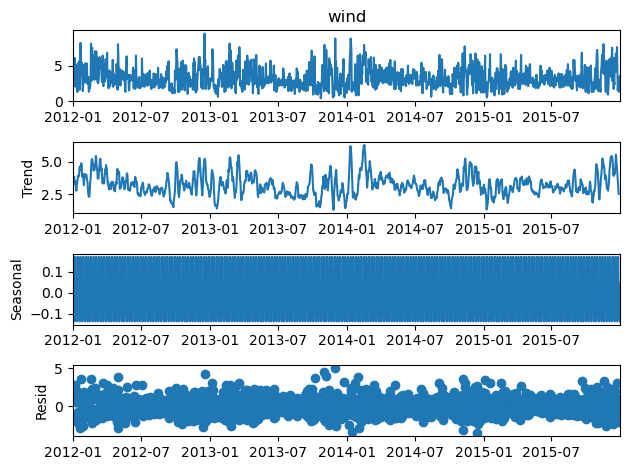

In [45]:
#Time Series Decomposition
#Four kinds of components help make a time series, and also
#they can affect our time series analysis if present in 
#excess. So here, for this time series
#we need to check more for the availability of components.

#Time series decomposition is a technique that splits a 
#time series into several components, each representing an
#underlying pattern category. These components are level, 
#trend, seasonality, ( All three are systematic components) and noise (Non-systematic component of the time series).

#Applies additive seasonal decomposition to each column specified in data_list assuming weekly seasonality and plots the decomposed time series.

for data in data_list:
    decompose_ts_add = seasonal_decompose(df[data], model="additive", period=7)  # assuming weekly seasonality
    decompose_ts_add.plot()


In [46]:
df[data].dropna(inplace=True)


In [58]:
#Defines a function test_stationarity that performs rolling statistics analysis, plots the original time series 
#along with rolling mean and standard deviation, and conducts the Dickey-Fuller test on a randomly generated time series.

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [59]:
#Dickey-Fuller test is a statistical test used to determine whether a time series is stationary or non-stationary
'''A stationary data is one whose statistical properties, such as mean, variance
do not change over time. 
a non-stationary data exhibits trends, seasonality, or other patterns that make its statistical properties change over time'''
def test_stationarity(time_series):
    # Convert month strings to datetime objects
    time_series.index = pd.to_datetime(time_series.index)
    
    # Determining rolling statistics
    roll_mean = time_series.rolling(window=7).mean()
    roll_std = time_series.rolling(window=7).std()
    
    # Plotting rolling statistics
    orig = plt.plot(time_series.resample('M').mean(), color='blue', label='Original')
    mean = plt.plot(roll_mean.resample('M').mean(), color='red', label='Rolling mean')
    std = plt.plot(roll_std.resample('M').mean(), color='green', label='Rolling standard')
    plt.legend(loc='best')
    plt.show(block=False)
    
    # Performance of Dickey-Fuller test
    print("Result of Dickey-Fuller test")
    result = adfuller(time_series, autolag='AIC')
    print("ADF statistics: %f" % result[0])
    print("p-value:   %f" % result[1])
    print("Critical values")
    for key, value in result[4].items():
        print(key, value)

        

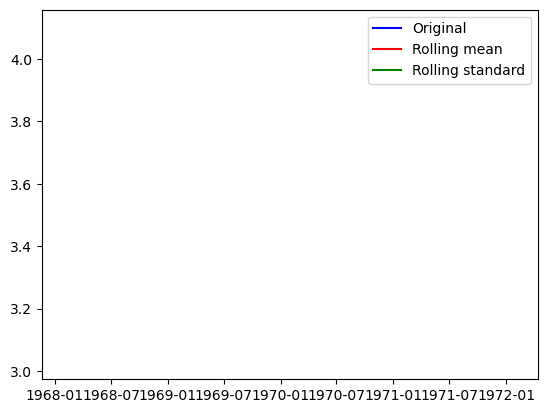

Result of Dickey-Fuller test
ADF statistics: -16.797531
p-value:   0.000000
Critical values
1% -3.434843038681996
5% -2.8635243777871286
10% -2.56782646544019


In [60]:
#Applies the test_stationarity function to analyze and visualize the stationarity of the 'sales_a' time series.

test_stationarity(weather_a) 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def make_stationary(time_series):
    # 1st difference to remove trend
    diff1 = time_series.diff().dropna()

    # Plotting the differenced series
    #plt.plot(diff1)
    #plt.title('First Difference of Time Series')
    #plt.show()

    # Perform Dickey-Fuller test on the differenced series
    print("Result of Dickey-Fuller test after 1st difference:")
    result_diff1 = adfuller(diff1, autolag='AIC')
    print("ADF statistics: %f" % result_diff1[0])
    print("p-value:   %f" % result_diff1[1])
    print("Critical values")
    for key, value in result_diff1[4].items():
        print(key, value)

# Assuming 'water_a' is your time series
# Example usage
make_stationary(weather_a)

Result of Dickey-Fuller test after 1st difference:
ADF statistics: -13.767981
p-value:   0.000000
Critical values
1% -3.434911997169608
5% -2.863554810504947
10% -2.567842671398422


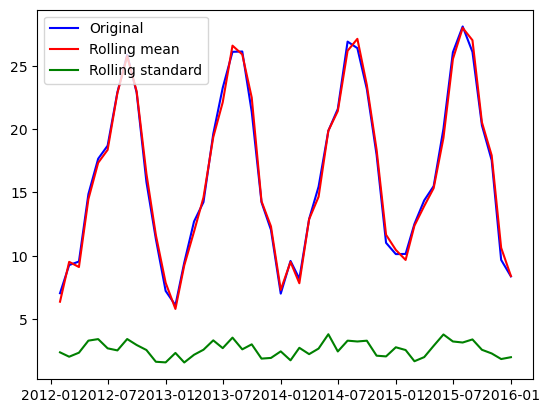

Result of Dickey-Fuller test
ADF statistics: -2.429205
p-value:   0.133663
Critical values
1% -3.4348772553489617
5% -2.8635394783531085
10% -2.5678345067434516


In [51]:
 test_stationarity(weather_b)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def make_stationary(time_series):
    # Differencing
    differenced_series = time_series.diff().dropna()

    """# Plotting the original and differenced series
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Time Series')
    plt.plot(differenced_series, label='Differenced Time Series')
    plt.legend()
    plt.title('Original vs. Differenced Time Series')
    plt.show()"""

    # Testing stationarity
    print("Result of Dickey-Fuller test on differenced series")
    result = adfuller(differenced_series, autolag='AIC')
    print("ADF statistics: %f" % result[0])
    print("p-value:   %f" % result[1])
    print("Critical values")
    for key, value in result[4].items():
        print(key, value)

# Assuming 'weather_b' is your non-stationary time series
make_stationary(weather_b)

Result of Dickey-Fuller test on differenced series
ADF statistics: -15.613175
p-value:   0.000000
Critical values
1% -3.4348772553489617
5% -2.8635394783531085
10% -2.5678345067434516


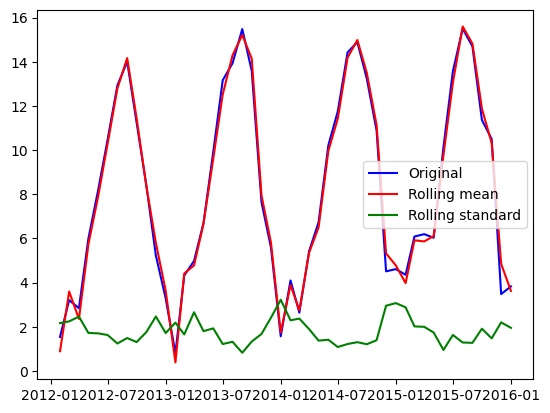

Result of Dickey-Fuller test
ADF statistics: -2.605620
p-value:   0.091841
Critical values
1% -3.4348772553489617
5% -2.8635394783531085
10% -2.5678345067434516


In [53]:
 test_stationarity(weather_c)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def make_stationary(time_series):
    # Differencing
    differenced_series = time_series.diff().dropna()

    """# Plotting the original and differenced series
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Time Series')
    plt.plot(differenced_series, label='Differenced Time Series')
    plt.legend()
    plt.title('Original vs. Differenced Time Series')
    plt.show()"""

    # Testing stationarity
    print("Result of Dickey-Fuller test on differenced series")
    result = adfuller(differenced_series, autolag='AIC')
    print("ADF statistics: %f" % result[0])
    print("p-value:   %f" % result[1])
    print("Critical values")
    for key, value in result[4].items():
        print(key, value)

# Assuming 'weather_c' is your non-stationary time series
make_stationary(weather_c)

Result of Dickey-Fuller test on differenced series
ADF statistics: -16.467376
p-value:   0.000000
Critical values
1% -3.4348772553489617
5% -2.8635394783531085
10% -2.5678345067434516


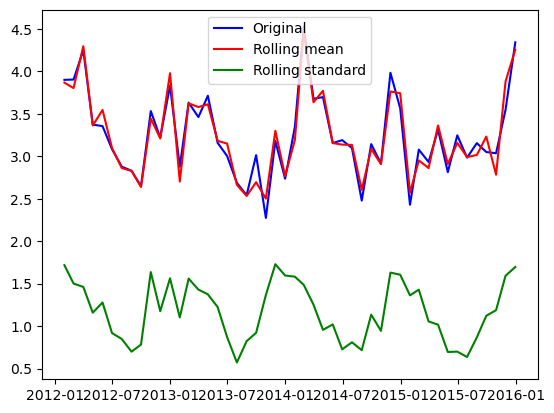

Result of Dickey-Fuller test
ADF statistics: -24.507372
p-value:   0.000000
Critical values
1% -3.434836872962171
5% -2.863521656701378
10% -2.567825016419591


In [55]:
 test_stationarity(weather_d)

#We can see from the above plots and statistical tests 
#that mean and variation doesn't change much with time, 
#i.e they are constant. Thus, we don't need to perform any
#transformation (needed when time series is not stationary).

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def make_stationary(time_series):
    # Differencing
    differenced_series = time_series.diff().dropna()

    """# Plotting the original and differenced series
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Time Series')
    plt.plot(differenced_series, label='Differenced Time Series')
    plt.legend()
    plt.title('Original vs. Differenced Time Series')
    plt.show()"""

    # Testing stationarity
    print("Result of Dickey-Fuller test on differenced series")
    result = adfuller(differenced_series, autolag='AIC')
    print("ADF statistics: %f" % result[0])
    print("p-value:   %f" % result[1])
    print("Critical values")
    for key, value in result[4].items():
        print(key, value)

# Assuming 'water_d' is your non-stationary time series
make_stationary(weather_d)

Result of Dickey-Fuller test on differenced series
ADF statistics: -12.491873
p-value:   0.000000
Critical values
1% -3.4349151819757466
5% -2.863556216004778
10% -2.5678434198545568


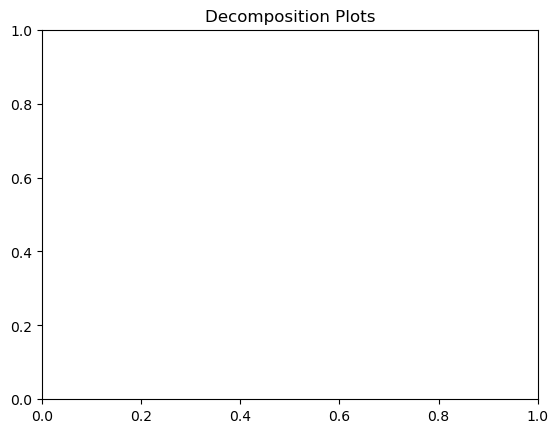

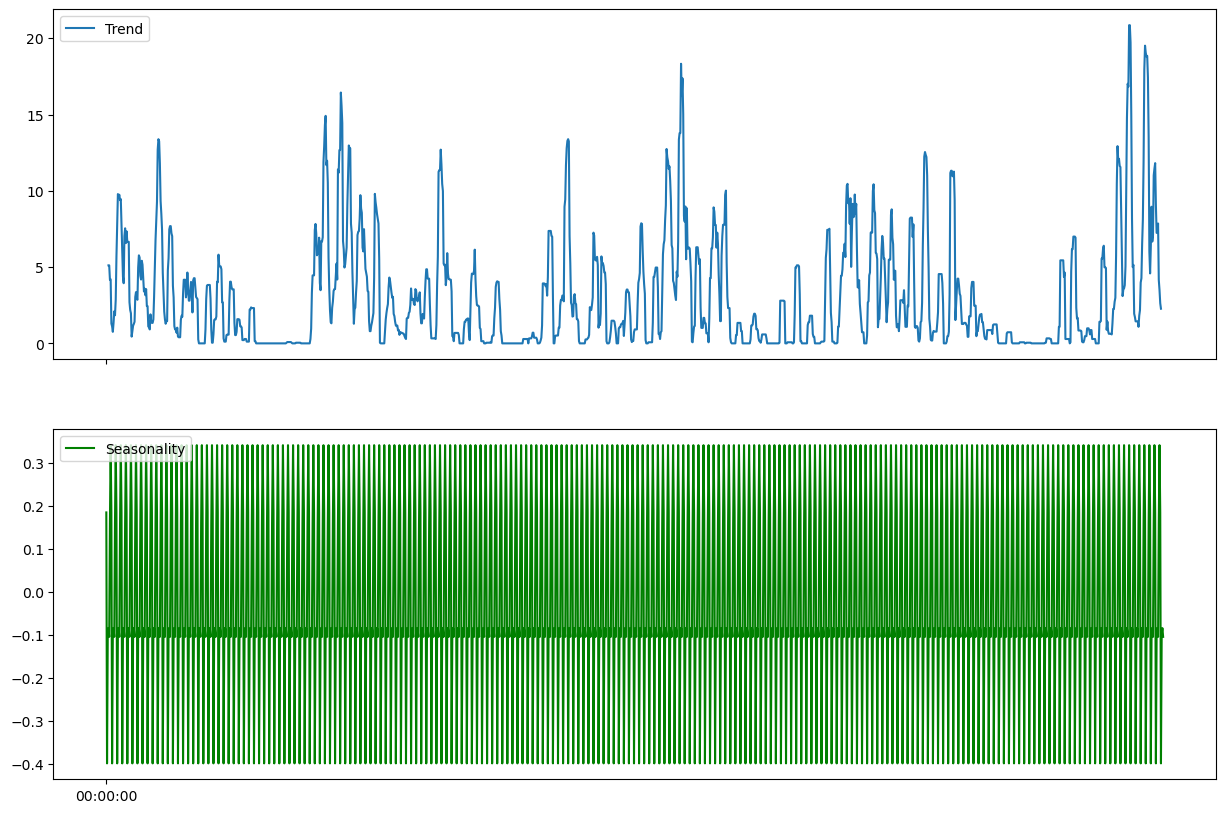

In [57]:
#Defines a function plot_timeseries that decomposes the time series into trend, seasonality, and residuals using 
#additive seasonal decomposition and plots the estimated trend and seasonality for the 'sales_a' time series.


from statsmodels.tsa.seasonal import seasonal_decompose
def plot_timeseries(sales):
        #fig,axes=plt.subplot(2,1,sharex=True,sharey=False)
        fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
        #plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')).
        fig.set_figheight(10)
        fig.set_figwidth(15)
     
    
        decomposition=seasonal_decompose(sales,model='additive',period=7)
        estimated_trend = decomposition.trend
        estimated_seasonal = decomposition.seasonal
        estimated_residual = decomposition.resid
        axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
        axes[1].legend(loc='upper left')
    
        axes[0].plot(estimated_trend, label='Trend')
        axes[0].legend(loc='upper left')

plt.title('Decomposition Plots')
       # Plotting seasonality and trend for salestype a
plot_timeseries(weather_a)

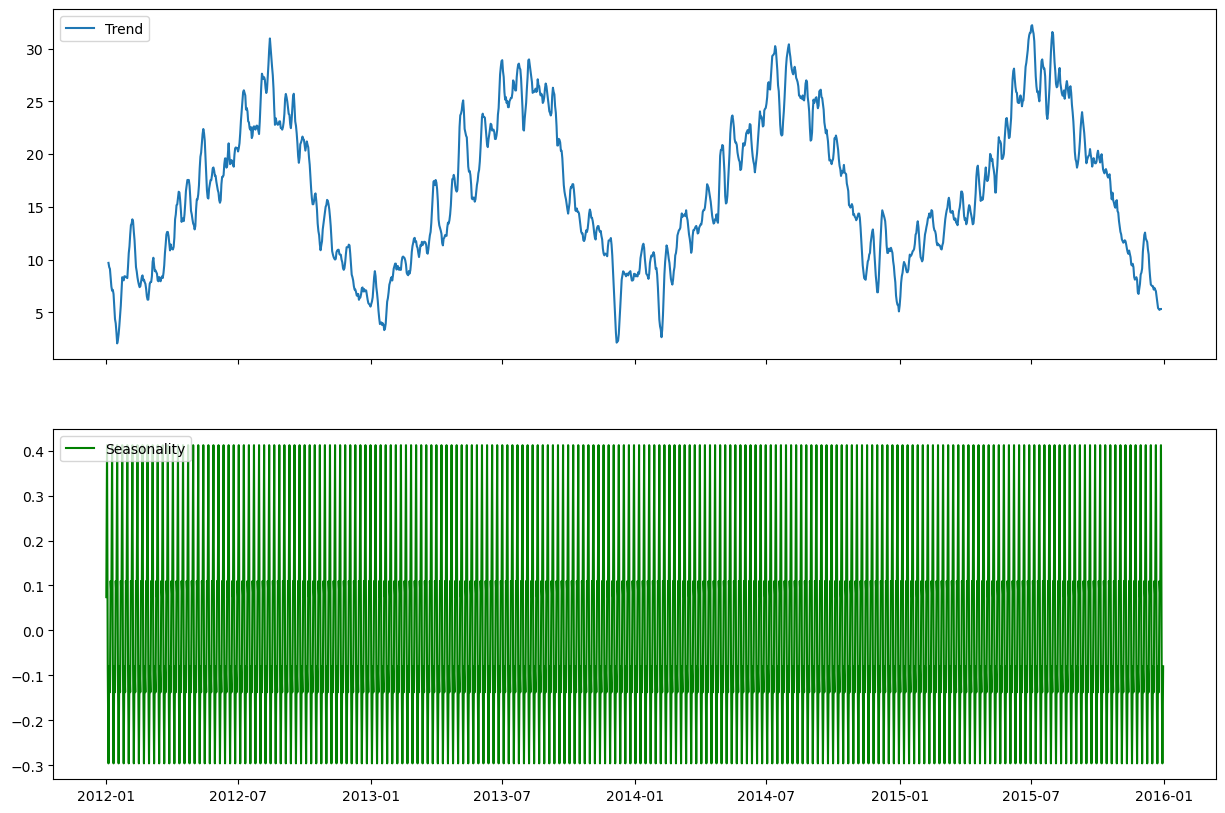

In [58]:
 plot_timeseries(weather_b)

#Plots the estimated trend and seasonality for the 'sales_b' time series using the plot_timeseries function.

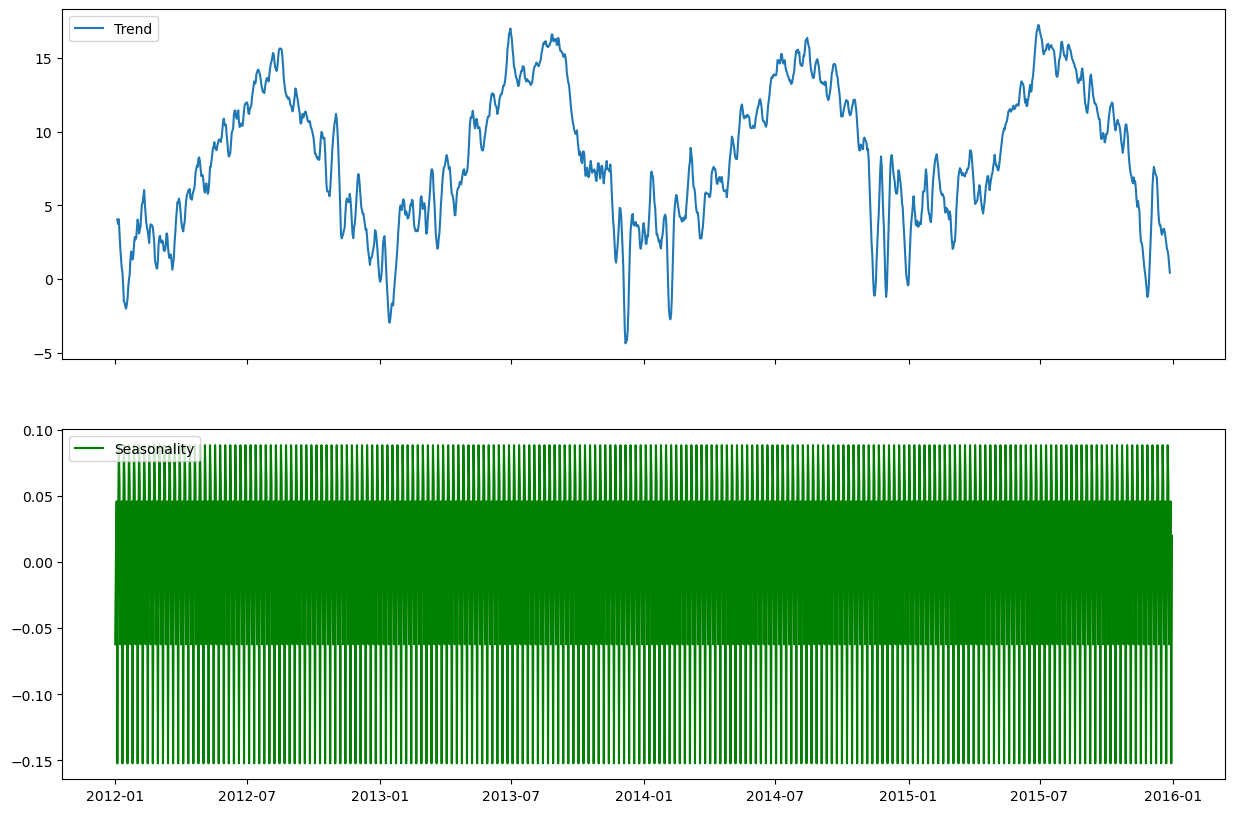

In [59]:
plot_timeseries(weather_c)

#Plots the estimated trend and seasonality for the 'sales_c' time series using the plot_timeseries function.

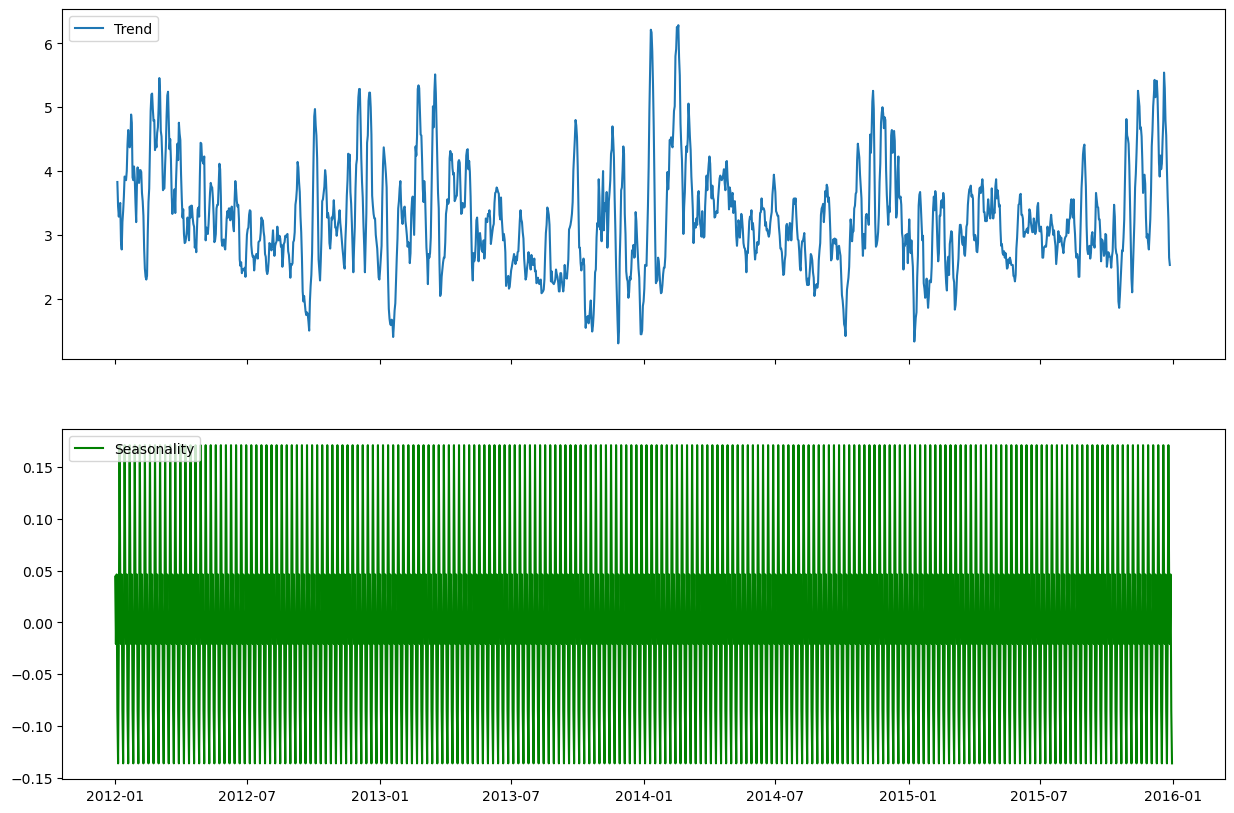

In [60]:
 plot_timeseries(weather_d)
    
#Plots the estimated trend and seasonality for the 'sales_d' time series using the plot_timeseries function.

In [61]:
#Data preparation
from feature_engine.outliers import Winsorizer


#Applies Winsorization to handle outliers in the specified columns ('temp_max', 'temp_min', 'wind', 'precipitation') using 
#the Winsorizer from the feature_engine library and plots boxplots for the transformed data.

In [62]:
winsor=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['temp_max','temp_min','wind','precipitation'])
df_t=winsor.fit_transform(df[['temp_max','temp_min','wind','precipitation']]) 




<Axes: >

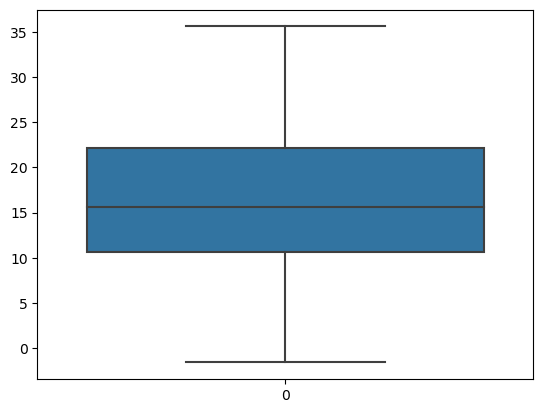

In [63]:
sns.boxplot(df_t.temp_max)


<Axes: >

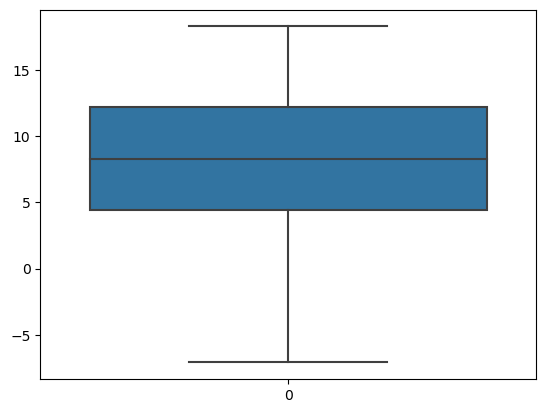

In [64]:
sns.boxplot(df_t.temp_min) 


<Axes: >

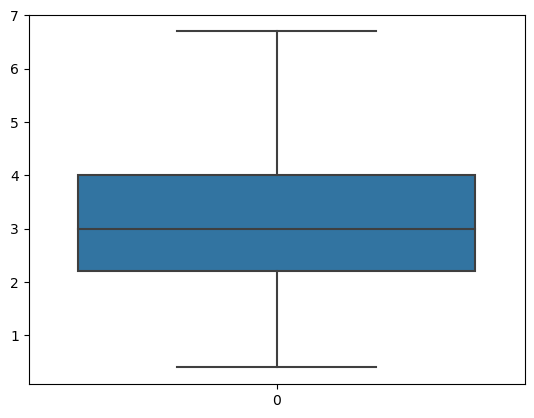

In [65]:

sns.boxplot(df_t.wind)


<Axes: >

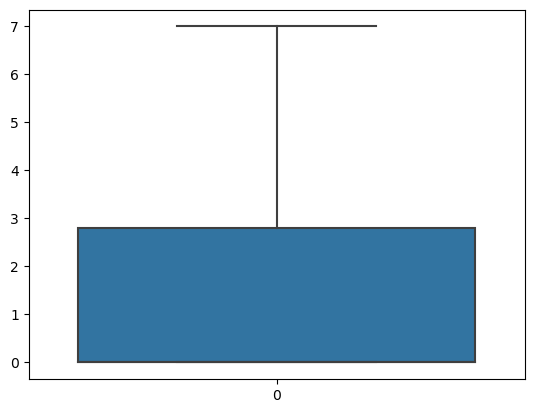

In [66]:

sns.boxplot(df_t.precipitation)

In [61]:
#  Dropping Duplicate data 
df.drop_duplicates()

precipitation  temp_max  temp_min  wind  weather  day  month  year
Date                                                                          
2012-01-01            0.0      12.8       5.0   4.7  drizzle    1      1  2012
2012-01-02           10.9      10.6       2.8   4.5     rain    2      1  2012
2012-01-03            0.8      11.7       7.2   2.3     rain    3      1  2012
2012-01-04           20.3      12.2       5.6   4.7     rain    4      1  2012
2012-01-05            1.3       8.9       2.8   6.1     rain    5      1  2012
...                   ...       ...       ...   ...      ...  ...    ...   ...
2015-12-27            8.6       4.4       1.7   2.9     rain   27     12  2015
2015-12-28            1.5       5.0       1.7   1.3     rain   28     12  2015
2015-12-29            0.0       7.2       0.6   2.6      fog   29     12  2015
2015-12-30            0.0       5.6      -1.0   3.4      sun   30     12  2015
2015-12-31            0.0       5.6      -2.1   3.5      sun   31     12  2015

[1461 rows x 8 columns]

In [68]:
#  Dropping missing data 
df.isna().sum()
df.dropna(axis =0,inplace= True)
     
 

In [62]:
#Builds an automated time series forecasting model using the AutoTS library for the 'temp_max' column in the DataFrame df, 
#split into training and test sets, and returns the model, model results, validation results, and forecast.


from autots import AutoTS

df["day"]=pd.to_datetime(df["temp_max"])  
def model_build(target):
    
    train = df[0:1000]
    test=df[1000:1223]
    print(train.shape,test.shape)

    ts_column='temp_max'
    sep=','
   # target='M01AB'
 #   import autots as AT
#AT.Auto_Timeseries(train, ts_column,
#                            target, sep,  score_type='rmse', forecast_period=7,
#                            time_interval='day', non_seasonal_pdq=None, seasonality=True,
#                            seasonal_period=7,seasonal_PDQ=None, model_type='best',
#                            verbose=2)

    model = AutoTS(forecast_length=7,frequency='infer',prediction_interval=0.95,ensemble=None,model_list="fast",transformer_list="fast",drop_most_recent=1,max_generations=4,num_validations=2,validation_method="backwards")
    model = model.fit(train,date_col="day" ,value_col=target,id_col=None )
    
    # Predicting
    prediction = model.predict()
    forecast = pd.DataFrame(prediction.forecast)
    
    # plot a sample
    prediction.plot(model.df_wide_numeric,
                    series=model.df_wide_numeric.columns[0],
                    start_date=df["day"].iloc[-7])
    
    # accuracy of all tried model results
    model_results = model.results()
    model_results = pd.DataFrame(model_results)
  
    # and aggregated from cross validation
    validation_results = model.results("validation")

    
    return model,model_results,validation_results,forecast
####

                                             |                                                          | [  0…

Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
(1000, 8) (223, 8)
Data frequency is: N, used frequency is: N
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Template Eval Error: FloatingPointError('invalid value encountered in divide') in model 2 in generation 0: AverageValueNaive
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Template Eval Error: FloatingPointError('invalid value encountered in divide') in model 4 in generation 0: DatepartRegression
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Template Eval Error: FloatingPointError('invalid value encountered in divide') in model 6 in generation 0: DatepartRegression
Model Number: 7

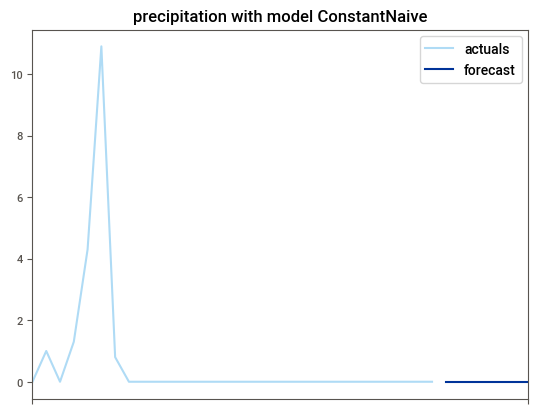

In [70]:
#Creates a scikit-learn pipeline named pipe that sequentially applies Exploratory Data Analysis (EDA) and builds a
#precipitation forecasting model using the model_build function.

pipe = Pipeline([("EDA",EDA()),("Model",model_build("precipitation"))])

In [71]:
import pickle
from sklearn.metrics import mean_squared_error
import numpy as np
import os



(1000, 8) (223, 8)
Data frequency is: N, used frequency is: N
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Template Eval Error: FloatingPointError('invalid value encountered in divide') in model 2 in generation 0: AverageValueNaive
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Template Eval Error: FloatingPointError('invalid value encountered in divide') in model 4 in generation 0: DatepartRegression
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Template Eval Error: FloatingPointError('invalid value encountered in divide') in model 6 in generation 0: DatepartRegression
Model Number: 7 with model DatepartRegression in generation 0 of 4
Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.4681
Epoch 2/50
1/1 [===

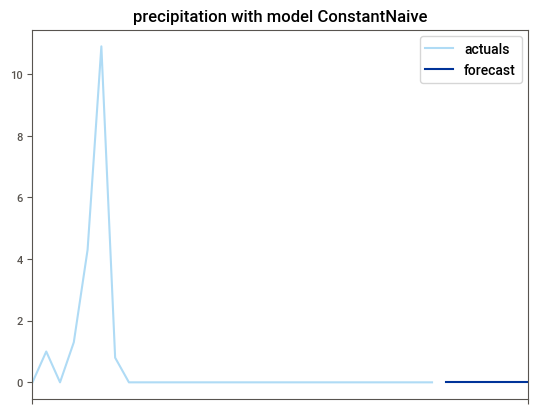

In [72]:
target = 'precipitation'
model, model_results, validation_results, forecast1 = model_build(target)
print(forecast1)



In [73]:
# Check if the directory exists, create if not
model_dir = 'C:/Final Project/post_get/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'Auto_model.pkl')




In [74]:
try:
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {model_path}")
except Exception as e:
    print(f"Error saving model: {e}")

try:
    with open(model_path, 'rb') as f:
        loaded_model = pickle.load(f)
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {e}")

print(forecast1)

Model saved to C:/Final Project/post_get/Auto_model.pkl
Model loaded successfully
                               precipitation
1970-01-01 00:00:00.000000035   7.233845e-16
1970-01-01 00:00:00.000000036   7.233845e-16
1970-01-01 00:00:00.000000037   7.233845e-16
1970-01-01 00:00:00.000000038   7.233845e-16
1970-01-01 00:00:00.000000039   7.233845e-16
1970-01-01 00:00:00.000000040   7.233845e-16
1970-01-01 00:00:00.000000041   7.233845e-16


In [75]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded the data into 'df' and obtained 'forecast1'

weather_a = df.precipitation

# Make sure the length of 'weather_a_test' matches the length of 'forecast1'
forecast_length = len(forecast1)
start_index = 1000
end_index = start_index + forecast_length

# Slice 'weather_a' to match the length of 'forecast1'
weather_a_test = weather_a[start_index:end_index]

# Check if the lengths of 'weather_a_test' and 'forecast1' are the same
if len(weather_a_test) == len(forecast1):
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(weather_a_test, forecast1))
    print(f"RMSE for precipitation: {rmse}")
else:
    print("Error: Input variables have inconsistent numbers of samples.")

RMSE for precipitation: 0.3023715784073815


(1000, 8) (223, 8)
Data frequency is: N, used frequency is: N
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.3332
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3314
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.3312
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3271
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3263
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3345
Epoch 7/50


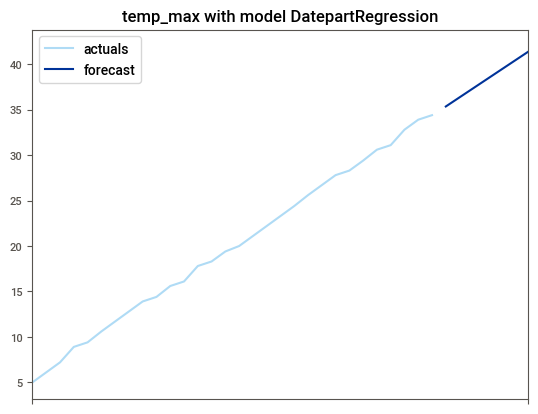

In [76]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Builds an automated time series forecasting model for the 'temp_max' column
# and generates forecasts
target = 'temp_max'
model, model_results, validation_results, forecast2 = model_build(target)
print(forecast2)

# Check if the length of the forecast matches the length of the 'temp_max' column
weather_b = df['temp_max']
if len(weather_b) == len(forecast2):
    weather_b_test = weather_b[1000:1224]
    if len(weather_b_test) == len(forecast2):
        # Calculate RMSE
        np.sqrt(mean_squared_error(weather_b_test, forecast2))
    else:
        print("Length mismatch between 'temp_max' and the forecast.")
else:
    print("Length mismatch between 'temp_ImageMax' and the forecast.")

(1000, 8) (223, 8)
Data frequency is: N, used frequency is: N
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.3219
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3213
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3203
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3172
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.3161
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3233
Epoch 7/50


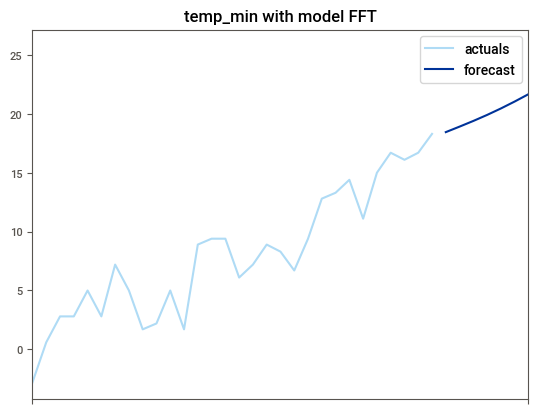

In [77]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Builds an automated time series forecasting model for the 'temp_min' column
# and generates forecasts
target = 'temp_min'
model, model_results, validation_results, forecast3 = model_build(target)
print(forecast3)

# Check if the length of the forecast matches the length of the 'temp_min' column
weather_c = df['temp_min']
if len(weather_c) == len(forecast3):
    # Determine the start and end indices for slicing
    start_index = 1000
    end_index = start_index + len(forecast3)
    
    # Slice 'weather_c' to match the length of 'forecast3'
    weather_c_test = weather_c[start_index:end_index]
    
    if len(weather_c_test) == len(forecast3):
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(weather_c_test, forecast3))
        print(f"RMSE for temp_min: {rmse}")
    else:
        print("Length mismatch between 'temp_min' and the forecast.")
else:
    print("Length mismatch between 'temp_min' and the forecast.")

(1000, 8) (223, 8)
Data frequency is: N, used frequency is: N
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.3311
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3285
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3282
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3249
Epoch 5/50
1/1 [==============================] - 0s 7ms/step - loss: 0.3242
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.3244
Epoch 7/50


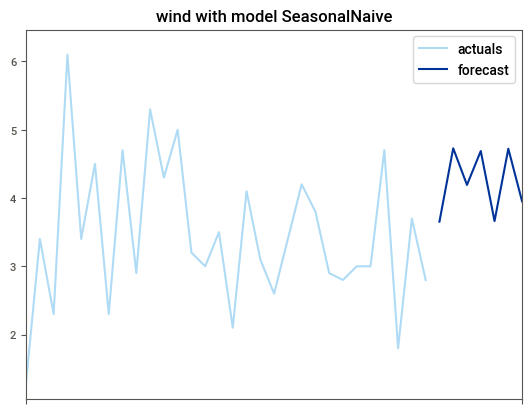

In [78]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Builds an automated time series forecasting model for the 'wind' column
# and generates forecasts
target = 'wind'
model, model_results, validation_results, forecast4 = model_build(target)
print(forecast4)

# Check if the length of the forecast matches the length of the 'wind' column
weather_d = df['wind']
if len(weather_d) == len(forecast4):
    # Determine the start and end indices for slicing
    start_index = 1000
    end_index = start_index + len(forecast4)
    
    # Slice 'weather_d' to match the length of 'forecast4'
    weather_d_test = weather_d[start_index:end_index]
    
    if len(weather_d_test) == len(forecast4):
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(weather_d_test, forecast4))
        print(f"RMSE for wind: {rmse}")
    else:
        print("Length mismatch between 'wind' and the forecast.")
else:
    print("Length mismatch between 'wind' and the forecast.")

In [79]:
import pandas as pd

from prophet import Prophet

In [80]:
ts = pd.DataFrame({'ds': df['temp_max'], 'y': df['precipitation']})

In [81]:
ts['ds'] = pd.to_datetime(ts['ds'])


In [82]:
#Creates a Prophet time series forecasting model named sample_model2 with specified configuration parameters.

sample_model2 = Prophet(
    growth='linear',
    daily_seasonality=7,
    seasonality_mode='additive',
    changepoint_prior_scale=0.30
)

# Now you can use sample_model2 for time series forecasting

In [83]:
sample_model2.fit(ts)

16:26:29 - cmdstanpy - INFO - Chain [1] start processing
16:26:30 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
 # Get RMSE values
def RMSE(prediction, original):
    diff = (prediction - original)
    return np.sqrt(np.mean(diff * diff))

#Defines a function RMSE that calculates the Root Mean Squared Error (RMSE) between the 'prediction' and 'original' values.

In [64]:
# Set a seed for reproducibility
np.random.seed(42)

# Create a DataFrame with the date range
pred_date = pd.date_range(start="2024-6-11", periods=7)


In [65]:
pred_df = pd.DataFrame({'ds': pred_date})
pred_df



ds
0 2024-06-11
1 2024-06-12
2 2024-06-13
3 2024-06-14
4 2024-06-15
5 2024-06-16
6 2024-06-17

In [87]:
# Add columns for temp_max, temp_min, wind, and weather
pred_df['temp_max'] = np.random.randint(25, 35, size=len(pred_df))
pred_df['temp_min'] = np.random.randint(15, 25, size=len(pred_df))
pred_df['wind'] = np.random.randint(5, 15, size=len(pred_df))



In [88]:
# Define a list of weather conditions
weather_conditions = ['Sunny', 'Partly Cloudy', 'Cloudy', 'Rainy', 'Thunderstorm']

# Add a 'weather' column with random weather conditions
pred_df['weather'] = np.random.choice(weather_conditions, size=len(pred_df))

# Display the DataFrame
print(pred_df)

#Generates a DataFrame pred_df with a date range starting from "2023-12-20" for a period of 7 days. Adds columns for 'temp_max', 
#'temp_min', 'wind', and 'weather' with random values.

          ds  temp_max  temp_min  wind        weather
0 2024-06-11        31        21    10          Sunny
1 2024-06-12        28        22     9          Rainy
2 2024-06-13        32        19     6  Partly Cloudy
3 2024-06-14        29        18    12   Thunderstorm
4 2024-06-15        31        22    10          Rainy
5 2024-06-16        34        22     6          Sunny
6 2024-06-17        27        17     9          Sunny


In [89]:
# use our created date range 
pred_precepitation = sample_model2.predict(pred_df) # taking same time train data to predict then  we will compare both RMSE values.
pred_precepitation# Here we are getting date that we want.

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2024-06-11 -2.105539e+17 -2.105589e+17 -2.105489e+17 -2.105589e+17   
1 2024-06-12 -2.105645e+17 -2.105798e+17 -2.105477e+17 -2.105798e+17   
2 2024-06-13 -2.105751e+17 -2.106050e+17 -2.105433e+17 -2.106050e+17   
3 2024-06-14 -2.105856e+17 -2.106341e+17 -2.105349e+17 -2.106341e+17   
4 2024-06-15 -2.105962e+17 -2.106675e+17 -2.105257e+17 -2.106675e+17   
5 2024-06-16 -2.106068e+17 -2.107046e+17 -2.105116e+17 -2.107046e+17   
6 2024-06-17 -2.106174e+17 -2.107422e+17 -2.104961e+17 -2.107422e+17   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0 -2.105489e+17        0.958811              0.958811              0.958811   
1 -2.105477e+17        0.958811              0.958811              0.958811   
2 -2.105433e+17        0.958811              0.958811              0.958811   
3 -2.105349e+17        0.958811              0.958811              0.958811   
4 -2.105257e+17        0.958811              0.958811              0.958811   
5 -2.105116e+17        0.958811              0.958811              0.958811   
6 -2.104961e+17        0.958811              0.958811              0.958811   

      daily  daily_lower  daily_upper  multiplicative_terms  \
0  0.958811     0.958811     0.958811                   0.0   
1  0.958811     0.958811     0.958811                   0.0   
2  0.958811     0.958811     0.958811                   0.0   
3  0.958811     0.958811     0.958811                   0.0   
4  0.958811     0.958811     0.958811                   0.0   
5  0.958811     0.958811     0.958811                   0.0   
6  0.958811     0.958811     0.958811                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0 -2.105539e+17  
1                         0.0                         0.0 -2.105645e+17  
2                         0.0                         0.0 -2.105751e+17  
3                         0.0                         0.0 -2.105856e+17  
4                         0.0                         0.0 -2.105962e+17  
5                         0.0                         0.0 -2.106068e+17  
6                         0.0                         0.0 -2.106174e+17

In [90]:
future_zero = sample_model2.make_future_dataframe(periods=0)
future_zero # if take period x number then it will add x more dates to axisting 366 rows. 

ds
0  1969-12-31 23:59:59.999999999
1  1970-01-01 00:00:00.000000000
2  1970-01-01 00:00:00.000000001
3  1970-01-01 00:00:00.000000002
4  1970-01-01 00:00:00.000000003
5  1970-01-01 00:00:00.000000004
6  1970-01-01 00:00:00.000000005
7  1970-01-01 00:00:00.000000006
8  1970-01-01 00:00:00.000000007
9  1970-01-01 00:00:00.000000008
10 1970-01-01 00:00:00.000000009
11 1970-01-01 00:00:00.000000010
12 1970-01-01 00:00:00.000000011
13 1970-01-01 00:00:00.000000012
14 1970-01-01 00:00:00.000000013
15 1970-01-01 00:00:00.000000014
16 1970-01-01 00:00:00.000000015
17 1970-01-01 00:00:00.000000016
18 1970-01-01 00:00:00.000000017
19 1970-01-01 00:00:00.000000018
20 1970-01-01 00:00:00.000000019
21 1970-01-01 00:00:00.000000020
22 1970-01-01 00:00:00.000000021
23 1970-01-01 00:00:00.000000022
24 1970-01-01 00:00:00.000000023
25 1970-01-01 00:00:00.000000024
26 1970-01-01 00:00:00.000000025
27 1970-01-01 00:00:00.000000026
28 1970-01-01 00:00:00.000000027
29 1970-01-01 00:00:00.000000028
30 1970-01-01 00:00:00.000000029
31 1970-01-01 00:00:00.000000030
32 1970-01-01 00:00:00.000000031
33 1970-01-01 00:00:00.000000032
34 1970-01-01 00:00:00.000000033
35 1970-01-01 00:00:00.000000034
36 1970-01-01 00:00:00.000000035

In [91]:
pred_temp_max= sample_model2.predict(future_zero) # taking same time train data to predict then  we will compare both RMSE values.
pred_temp_max# Here we are getting date that we want.

ds     trend  yhat_lower  yhat_upper  \
0  1969-12-31 23:59:59.999999999  0.136363   -6.717884    9.453683   
1  1970-01-01 00:00:00.000000000  0.481660   -6.866813    8.858537   
2  1970-01-01 00:00:00.000000001  0.826958   -6.543353   10.239154   
3  1970-01-01 00:00:00.000000002  1.172255   -5.866411   10.303354   
4  1970-01-01 00:00:00.000000003  1.517553   -5.654415   10.642453   
5  1970-01-01 00:00:00.000000004  1.862850   -4.840548   11.131931   
6  1970-01-01 00:00:00.000000005  2.208147   -5.480152   11.168464   
7  1970-01-01 00:00:00.000000006  2.553445   -4.716165   11.480488   
8  1970-01-01 00:00:00.000000007  2.898742   -3.719193   12.035703   
9  1970-01-01 00:00:00.000000008  3.244040   -3.851024   12.090086   
10 1970-01-01 00:00:00.000000009  3.589338   -3.518692   12.538285   
11 1970-01-01 00:00:00.000000010  3.923985   -3.401590   12.621569   
12 1970-01-01 00:00:00.000000011  4.228333   -2.689455   13.074680   
13 1970-01-01 00:00:00.000000012  4.532078   -2.875674   13.898134   
14 1970-01-01 00:00:00.000000013  4.715650   -2.243242   14.006696   
15 1970-01-01 00:00:00.000000014  4.310138   -3.922170   13.656202   
16 1970-01-01 00:00:00.000000015  3.792386   -3.838495   12.986639   
17 1970-01-01 00:00:00.000000016  2.965617   -3.918338   12.177184   
18 1970-01-01 00:00:00.000000017  2.138848   -4.203715   11.312405   
19 1970-01-01 00:00:00.000000018  1.341226   -5.583920   10.376944   
20 1970-01-01 00:00:00.000000019  0.875095   -6.501777    9.866305   
21 1970-01-01 00:00:00.000000020  0.408964   -7.062854    9.677682   
22 1970-01-01 00:00:00.000000021  0.125993   -6.922906    9.340490   
23 1970-01-01 00:00:00.000000022 -0.039233   -7.511745    8.792709   
24 1970-01-01 00:00:00.000000023 -0.185374   -7.142808    8.996641   
25 1970-01-01 00:00:00.000000024 -0.307927   -7.045300    8.529834   
26 1970-01-01 00:00:00.000000025 -0.430480   -7.552002    8.406344   
27 1970-01-01 00:00:00.000000026 -0.553033   -7.931469    8.155493   
28 1970-01-01 00:00:00.000000027 -0.675586   -7.595029    8.333767   
29 1970-01-01 00:00:00.000000028 -0.798139   -7.985838    8.787278   
30 1970-01-01 00:00:00.000000029 -0.920692   -8.496802    8.001326   
31 1970-01-01 00:00:00.000000030 -1.043245   -8.130036    7.977258   
32 1970-01-01 00:00:00.000000031 -1.165798   -8.354149    8.033601   
33 1970-01-01 00:00:00.000000032 -1.288351   -8.278614    7.890649   
34 1970-01-01 00:00:00.000000033 -1.410904   -8.277572    7.564287   
35 1970-01-01 00:00:00.000000034 -1.533457   -9.090374    7.489950   
36 1970-01-01 00:00:00.000000035 -1.656010   -8.885204    7.343024   

    trend_lower  trend_upper  additive_terms  additive_terms_lower  \
0      0.136363     0.136363        0.958883              0.958883   
1      0.481660     0.481660        0.958811              0.958811   
2      0.826958     0.826958        0.958811              0.958811   
3      1.172255     1.172255        0.958811              0.958811   
4      1.517553     1.517553        0.958811              0.958811   
5      1.862850     1.862850        0.958811              0.958811   
6      2.208147     2.208147        0.958811              0.958811   
7      2.553445     2.553445        0.958811              0.958811   
8      2.898742     2.898742        0.958811              0.958811   
9      3.244040     3.244040        0.958811              0.958811   
10     3.589338     3.589338        0.958811              0.958811   
11     3.923985     3.923985        0.958811              0.958811   
12     4.228333     4.228333        0.958811              0.958811   
13     4.532078     4.532078        0.958811              0.958811   
14     4.715650     4.715650        0.958811              0.958811   
15     4.310138     4.310138        0.958811              0.958811   
16     3.792386     3.792386        0.958811              0.958811   
17     2.965617     2.965617        0.958811              0.958811   
18     2.138848     2.138848        0.9

In [92]:
# Get RMSE values
def RMSE(prediction, original):
    diff = (prediction - original)
    return np.sqrt(np.mean(diff * diff))

In [93]:
pred_temp_max=pred_temp_max.set_index('ds')

In [94]:
ts2=ts.set_index('ds')

In [95]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='ds'>

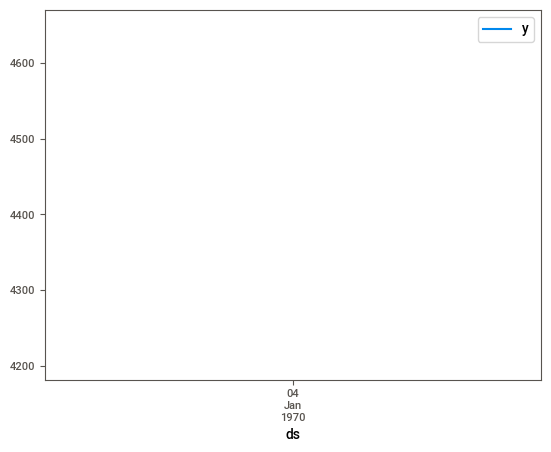

In [96]:
# Assuming 'ts2' is your DataFrame and the index is not a datetime index
# Convert the index to a datetime index
ts2.index = pd.to_datetime(ts2.index)

# Now you can use resample without the TypeError
ts2.resample('W').sum().plot()

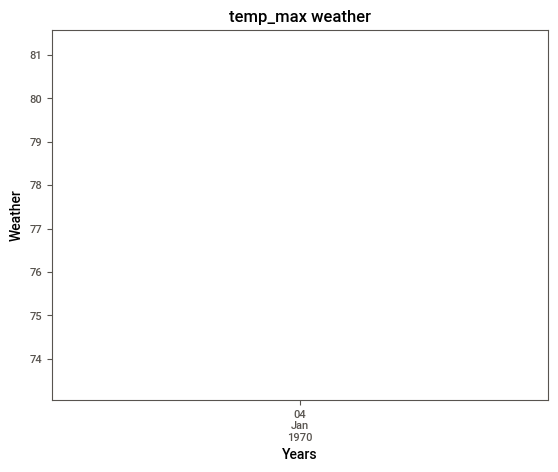

In [97]:
pred_temp_max.yhat.resample('W').sum().plot();plt.title('temp_max'+' '+'weather')
plt.xlabel('Years');plt.ylabel('Weather');plt.show()

In [98]:
print(RMSE(pred_temp_max.yhat, ts2.y))

6.36161071080043


In [99]:
weather_a=df.precipitation
weather_b=df.temp_max
weather_c=df.temp_min
weather_d=df.wind


In [100]:
#Model 1 - ARIMA ( Autoregressive Integrated Moving Average)
#In order to use this model, we need to first find out values of p, d and q. p represents number of Autoregressive terms - lags of dependent variable. q represents number of Moving Average terms - lagged forecast errors in prediction equation. d represents number of non-seasonal differences.
#To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.
#p value is the value on x-axis of PACF where the plot crosses the upper Confidence Interval for the first time. q value is the value on x-axis of ACF where the plot crosses the upper Confidence Interval for the first time.

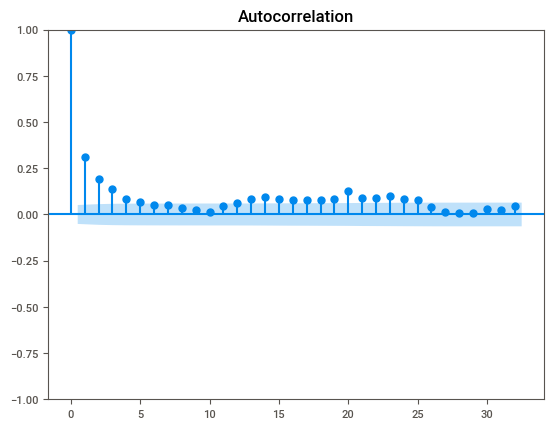

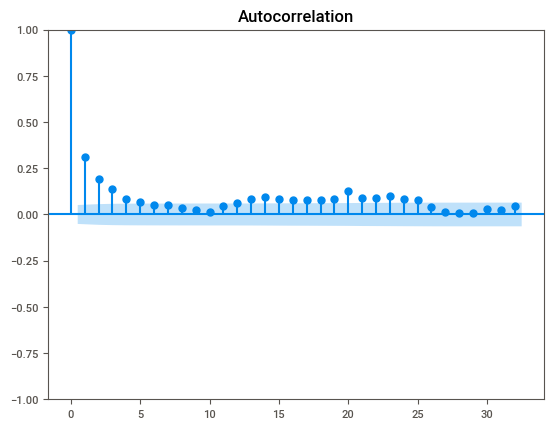

In [101]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(weather_a)

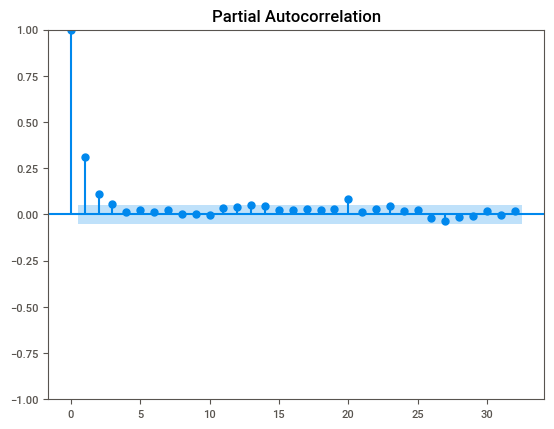

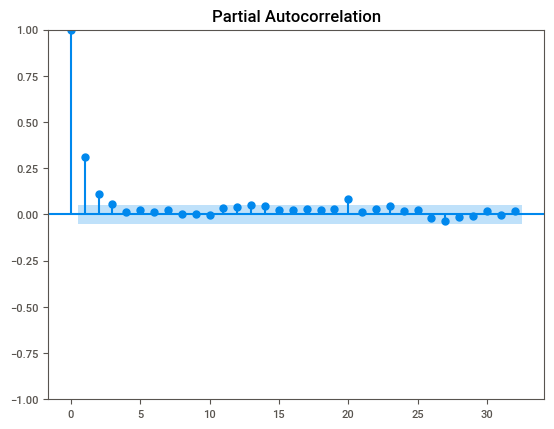

In [102]:
#ignoring 0 value from the plot ,it is clear that q=7
plot_pacf(weather_a)

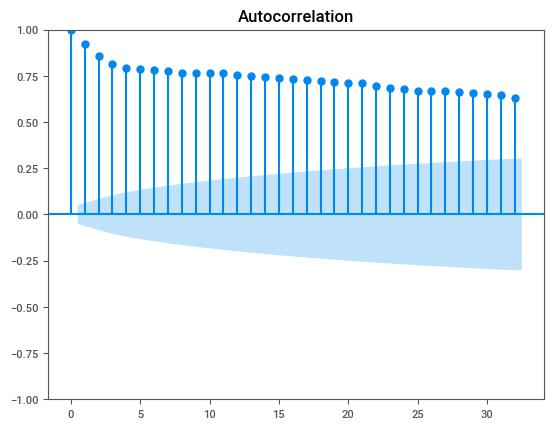

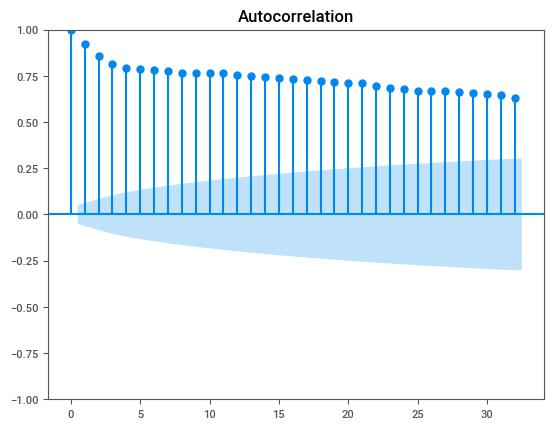

In [103]:
#from ponit 7 onwards the values going down hence p=7
#generally value of d is between 0 and 2
#for sales_a,  p=7,q=7,d=0-2
plot_acf(weather_b)

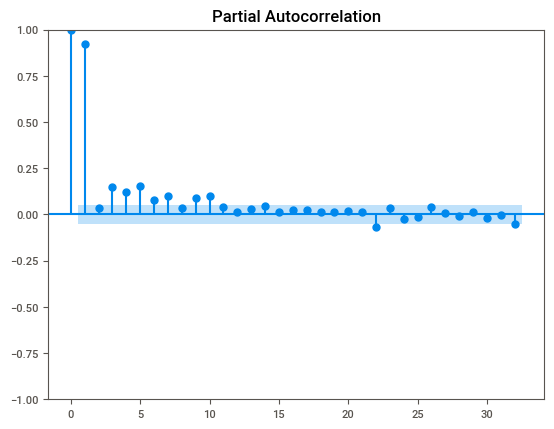

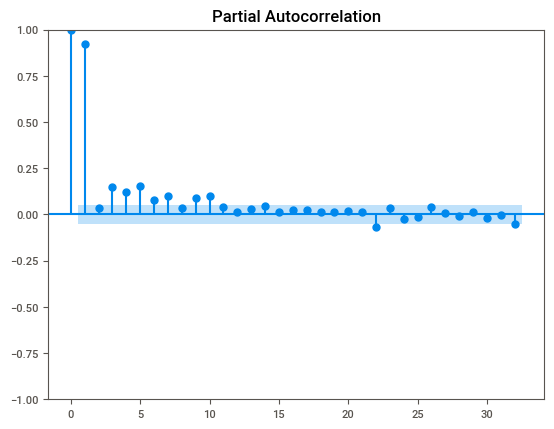

In [104]:
#from the plot ,it is clear that q=10 from 10 onwards cut of occurs
plot_pacf(weather_b)

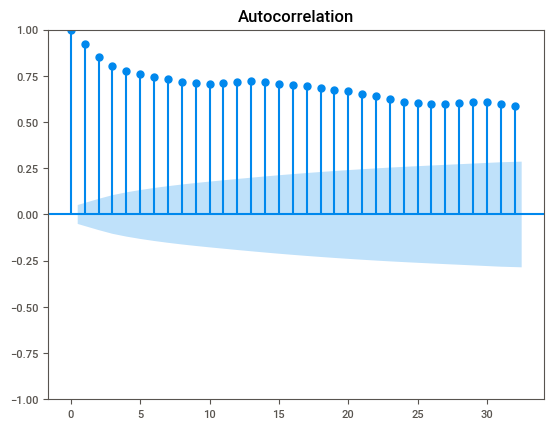

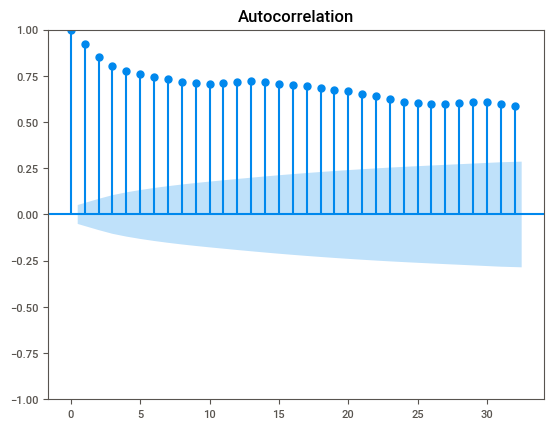

In [105]:
#from point 2 onwards the values going down hence p=1
#for sales_b=p=2,q=2,d=0-2
plot_acf(weather_c)

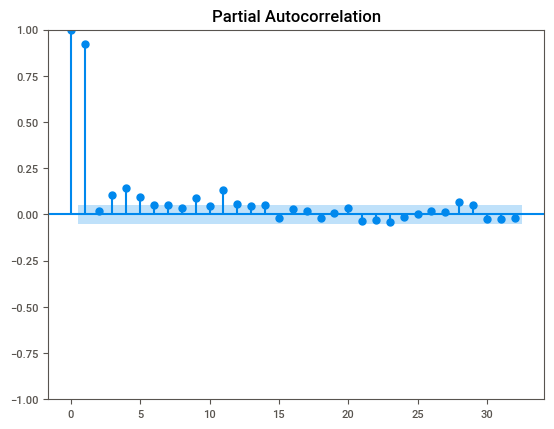

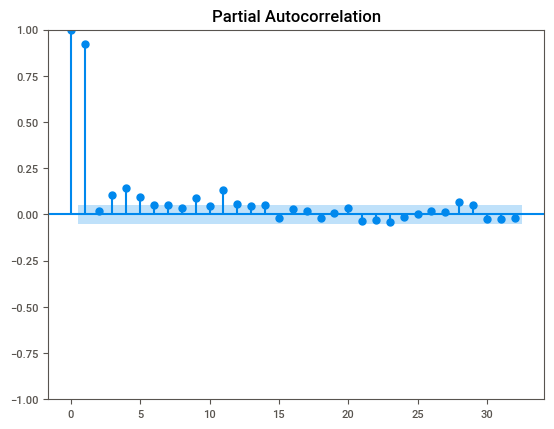

In [106]:
plot_pacf(weather_c)

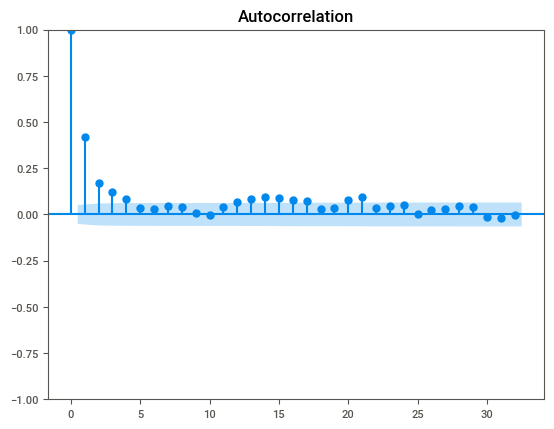

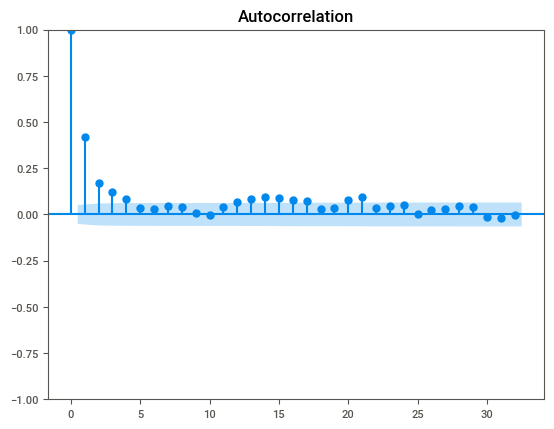

In [107]:
plot_acf(weather_d)
#This is random walk pattern q could be 7 or 14

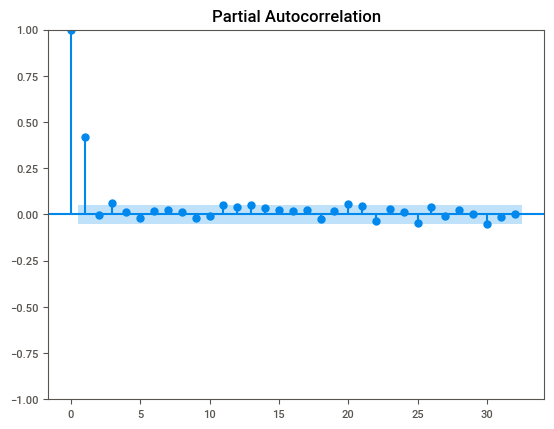

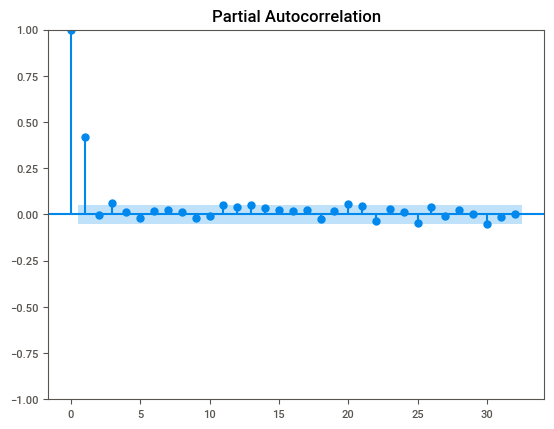

In [108]:
plot_pacf(weather_d)

In [20]:
#Let us apply this to Naive/base model
weather_a
weather_a_base=pd.concat([weather_a,weather_a.shift(1)],axis=1)

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example data (replace this with your actual data loading or generation)
X_normalized = np.random.rand(365, 10)  # Assuming 365 samples and 10 features
y = np.random.rand(365)  # Assuming 365 samples for the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a model (linear regression for this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on normalized data
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE) on normalized data:", rmse)



Root Mean Squared Error (RMSE) on normalized data: 0.3032797914979869


In [73]:
import joblib
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have a trained model object named 'model'


In [74]:
# Save the model object
joblib.dump(model, 'model.pkl')


['model.pkl']

In [75]:
weather_a_base.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [77]:
# Assuming you have a DataFrame named 'weather_a_base'

# Get the current number of columns
num_columns = len(weather_a_base.columns)

# Check if the number of columns matches the desired length
if num_columns == 2:
    # If the DataFrame has two columns, assign the new column names
    weather_a_base.columns = ["actual_weather_a", "predicted_weather_a"]
else:
    # If the DataFrame has a different number of columns, handle the situation
    print(f"Error: The DataFrame has {num_columns} columns, but you're trying to assign {2} column names.")
    print("Please provide the correct number of column names or modify the DataFrame accordingly.")

Error: The DataFrame has 5 columns, but you're trying to assign 2 column names.
Please provide the correct number of column names or modify the DataFrame accordingly.


In [79]:
# Assuming you have a DataFrame named 'weather_a_base' with 5 columns
# and you only need the first two columns
weather_a_base = weather_a_base.iloc[:, :2]  # Select the first two columns
weather_a_base.columns = ["actual_weather_a", "predicted_weather_a"]  # Assign new column names

In [80]:
# Assuming you have a DataFrame named 'weather_a_base'
weather_a_base.columns = ["actual_weather_a", "predicted_weather_a"]

In [81]:
weather_a_base.head()


actual_weather_a  predicted_weather_a
Date                                             
2012-01-01               0.0                 12.8
2012-01-02              10.9                 10.6
2012-01-03               0.8                 11.7
2012-01-04              20.3                 12.2
2012-01-05               1.3                  8.9

In [116]:
weather_a_base.dropna(inplace=True)


In [69]:
import pandas as pd

# Load the weather data from the CSV file
df= pd.read_csv('C:/Final Project/seattle-weather.csv',parse_dates=['Date'])
df

# Check if the file was loaded correctly
if not df.empty:
    # Assign the loaded data to weather_a_base
    weather_a_base = df

    # Convert the 'date' column to datetime format
    weather_a_base['Date'] = pd.to_datetime(weather_a_base['Date'])

    # Set the 'date' column as the index
    weather_a_base.set_index('Date', inplace=True)

    # Print the first few rows
    print(weather_a_base.head())
else:
    print("Error: Failed to load weather data from the CSV file.")

            precipitation  temp_max  temp_min  wind  weather
Date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


In [70]:
weather_a_base.head()


precipitation  temp_max  temp_min  wind  weather
Date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain

In [82]:
# Assuming you have a DataFrame named 'weather_a_base'
weather_a = weather_a_base['actual_weather_a']

In [83]:
weather_a_error = mean_squared_error(weather_a_base.actual_weather_a, weather_a_base.predicted_weather_a)
rmse = np.sqrt(weather_a_error)
print("RMSE:", rmse)


RMSE: 17.34424635399167


<Axes: xlabel='Date'>

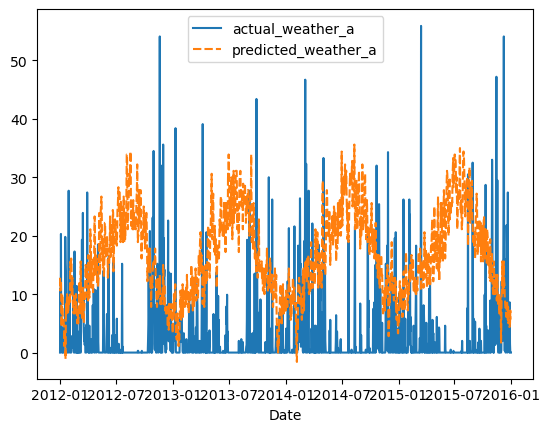

In [84]:
sns.lineplot(weather_a_base)

In [85]:
np.sqrt(weather_a_error)

17.34424635399167

In [86]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [87]:
 #Split the data into train and test
weather_a_train = weather_a[:366]
weather_a_test = weather_a[358:366]


In [88]:
# Fit the ARIMA model
model_weather_a = ARIMA(weather_a_train, order=(1, 0, 8))
res1 = model_weather_a.fit()

In [89]:
# Save the trained model
#joblib.dump(res1, 'model.pkl')

In [90]:
# Forecast for the next 7 days
start_index = len(weather_a_train)
end_index = start_index + 6
#forecast_weather_a = res1.forecast(steps=7)


In [91]:
forecast_weather_a = res1.predict(start=start_index, end=end_index)
print(forecast_weather_a)

2013-01-01    2.989519
2013-01-02    3.655425
2013-01-03    4.326041
2013-01-04    4.511368
2013-01-05    4.879448
2013-01-06    4.725282
2013-01-07    4.580778
Freq: D, Name: predicted_mean, dtype: float64


In [92]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ensure that weather_a_test and forecast_weather_a have the same length
min_length = min(len(weather_a_test), len(forecast_weather_a))
weather_a_test = weather_a_test[:min_length]
forecast_weather_a = forecast_weather_a[:min_length]

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(weather_a_test, forecast_weather_a))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 4.774761388678758


In [131]:
# Calculate the RMSE for the forecast
#rmse_forecast = np.sqrt(mean_squared_error(weather_a_test[-7:], forecast_weather_a))
#print("RMSE (Forecast):", rmse_forecast)

# Tuning of the model

In [132]:
#Tuning of the model
import warnings
warnings.filterwarnings("ignore")

In [133]:
# Define the p, d and q parameters to take any value between 0 and 3
p = q = range(0, 10)
d=(0,2)

In [134]:
import itertools
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [135]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]

In [136]:
print('Examples of parameter combinations for Seasonal ARIMA: ')

Examples of parameter combinations for Seasonal ARIMA: 


In [137]:
print('ARIMA:{}'.format(pdq[0]))

ARIMA:(0, 0, 0)


In [138]:
print('ARIMA:{}'.format(pdq[1]))

ARIMA:(0, 0, 1)


In [139]:
print('ARIMA:{}'.format(pdq[2]))

ARIMA:(0, 0, 2)


In [93]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm


In [94]:
weather_a_train=weather_a[0:366]
weather_a_test=weather_a[358:366]

In [95]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example data (replace this with your actual data loading or generation)
X_normalized = np.random.rand(365, 10)  # Assuming 365 samples and 10 features
y = np.random.rand(365)  # Assuming 365 samples for the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a model (linear regression for this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on normalized data
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE) on normalized data:", rmse)


Root Mean Squared Error (RMSE) on normalized data: 0.3146704313604105


In [143]:
for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(weather_a_train,order=param)

            results = mod.fit()

            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue

ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.6332998483413
ARIMA(0, 0, 0)- AIC:2410.

In [96]:
import pickle        
order=(2,0,8)   

In [97]:
weather_a_train=weather_a[0:366]
weather_a_test=weather_a[366:358]

In [98]:
model_weather_a = ARIMA(weather_a_train, order = (2,0,8))

In [99]:
res1 = model_weather_a.fit()

In [100]:
import joblib
joblib.dump(model_weather_a,'model_1_ARIMA.pkl')

['model_1_ARIMA.pkl']

In [101]:
import os
import joblib

# Set the desired directory
desired_dir = os.path.join(os.path.expanduser("~"), "Final Project")

# Create the directory if it doesn't exist
os.makedirs(desired_dir, exist_ok=True)

# Save the model to the desired directory
joblib.dump(model_weather_a, os.path.join(desired_dir, 'model_1_ARIMA.pkl'))

['C:\\Users\\hp\\Final Project\\model_1_ARIMA.pkl']

In [102]:
import joblib

# Set the desired directory
desired_dir = 'C:/Final Project/model_1_ARIMA.pkl'

# Create the directory if it doesn't exist
os.makedirs(desired_dir, exist_ok=True)

# Save the model to the desired directory
joblib.dump(model_weather_a, os.path.join(desired_dir, 'model_1_ARIMA.pkl'))


['C:/Final Project/model_1_ARIMA.pkl\\model_1_ARIMA.pkl']

In [103]:
# Forecast for next 7 days
start_index = len(weather_a_train)


In [104]:
end_index = start_index + 6

In [105]:
forecast_weather_a = res1.predict(start=start_index, end=end_index)

In [106]:
print(forecast_weather_a)

2013-01-01    1.665148
2013-01-02    1.245412
2013-01-03    2.456415
2013-01-04    2.342492
2013-01-05    3.143373
2013-01-06    3.079380
2013-01-07    3.248481
Freq: D, Name: predicted_mean, dtype: float64


np.sqrt(mean_squared_error(weather_a_test,forecast_weather_a))

In [107]:
model_weather_a = ARIMA(weather_a_train, order=(2, 0, 8))
res1 = model_weather_a.fit()

In [108]:
with open('C:/Final Project/model_weather_a.pkl', 'wb') as f:
    pickle.dump(res1, f)

In [109]:
start_index = len(weather_a_train)

In [110]:
end_index = start_index + 6

In [111]:
forecast = res1.predict(start=start_index, end=end_index)

In [112]:
actual_values = weather_a_test.iloc[:7]  # Considering the first 7 rows for test
actual_values

Series([], Name: actual_weather_a, dtype: float64)

In [113]:
with open('C:/Final Project/model_weather_a.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [114]:
new_data = weather_a.iloc[110:117]
new_forecast = loaded_model.predict(start=len(weather_a), end=len(weather_a) + 6)  # Adjust this based on your needs
print(f"New Forecast: {new_forecast}")

New Forecast: 2016-01-01    3.298761
2016-01-02    3.298765
2016-01-03    3.298769
2016-01-04    3.298773
2016-01-05    3.298777
2016-01-06    3.298781
2016-01-07    3.298785
Freq: D, Name: predicted_mean, dtype: float64


In [115]:
#apply to naive base model


In [11]:
import pandas as pd

# Load the weather data from the CSV file
df= pd.read_csv('C:/Final Project/seattle-weather.csv', parse_dates=['Date'])
df

# Check if the file was loaded correctly
if not df.empty:
    # Assign the loaded data to weather_a_base
    weather_b_base = df

    # Convert the 'date' column to datetime format
    weather_b_base['Date'] = pd.to_datetime(weather_b_base['Date'])

    # Set the 'date' column as the index
    weather_b_base.set_index('Date', inplace=True)

    # Print the first few rows
    print(weather_b_base.head())
else:
    print("Error: Failed to load weather data from the CSV file.")

            precipitation  temp_max  temp_min  wind  weather
Date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


In [12]:
weather_b


0       12.8
1       10.6
2       11.7
3       12.2
4        8.9
        ... 
1456     4.4
1457     5.0
1458     7.2
1459     5.6
1460     5.6
Name: temp_max, Length: 1461, dtype: float64

In [13]:
weather_b_base=pd.concat([weather_b,weather_b.shift(1)],axis=1)

In [14]:
weather_b_base

temp_max  temp_max
0         12.8       NaN
1         10.6      12.8
2         11.7      10.6
3         12.2      11.7
4          8.9      12.2
...        ...       ...
1456       4.4       4.4
1457       5.0       4.4
1458       7.2       5.0
1459       5.6       7.2
1460       5.6       5.6

[1461 rows x 2 columns]

In [16]:
# Assuming you have a DataFrame named 'weather_a_base'
# First, check the number of columns in the DataFrame
num_cols = len(weather_b_base.columns)

# Create a list of new column names with the correct length
new_col_names = ["actual_weather_b", "predicted_weather_b"] * (num_cols // 2)

# If there are an odd number of columns, add an extra column name
if num_cols % 2 != 0:
    new_col_names.append("extra_col")

# Assign the new column names to the DataFrame
weather_b_base.columns = new_col_names

In [17]:
# Assuming you have a DataFrame named 'weather_a_base'
weather_b_base.columns = ["actual_weather_b", "predicted_weather_b"]

In [18]:
weather_b_base.columns

Index(['actual_weather_b', 'predicted_weather_b'], dtype='object')

In [19]:

import warnings
warnings.filterwarnings("ignore")


In [20]:

# Define the p, d and q parameters to take any value between 0 and 3
p = q = range(0, 7)
d=(0,2)


In [21]:
import itertools
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


In [22]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]


In [23]:
print('Examples of parameter combinations for Seasonal ARIMA: ')


Examples of parameter combinations for Seasonal ARIMA: 


In [24]:
print('ARIMA:{}'.format(pdq[0]))

ARIMA:(0, 0, 0)


In [174]:
print('ARIMA:{}'.format(pdq[1]))


ARIMA:(0, 0, 1)


In [175]:
print('ARIMA:{}'.format(pdq[2]))

ARIMA:(0, 0, 2)


In [25]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm


In [26]:
weather_b_train=weather_b[0:366]
weather_b_test=weather_b[358:366]


In [27]:

import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example data (replace this with your actual data loading or generation)
X_normalized = np.random.rand(365, 10)  # Assuming 365 samples and 10 features
y = np.random.rand(365)  # Assuming 365 samples for the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a model (linear regression for this example)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on normalized data
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE) on normalized data:", rmse)



Root Mean Squared Error (RMSE) on normalized data: 0.286184285457791


In [179]:

for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(weather_b_train,order=param)

            results = mod.fit()

            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue


ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 0)- AIC:2474.383670173356
ARIMA(0, 0, 

In [180]:
import pickle        
order=(2,0,8)   


In [28]:
weather_b_train=weather_b[0:366]
weather_b_test=weather_b[366:358]


In [29]:
model_weather_b = ARIMA(weather_b_train, order = (2,0,8))


In [30]:
res2 = model_weather_b.fit()


In [32]:
import joblib
import os

# Set the desired directory
desired_dir = 'C:/Final Project/model_2_ARIMA.pkl'

# Create the directory if it doesn't exist
os.makedirs(desired_dir, exist_ok=True)

# Save the model to the desired directory
joblib.dump(model_weather_b, os.path.join(desired_dir, 'model_2_ARIMA.pkl'))


['C:/Final Project/model_2_ARIMA.pkl\\model_2_ARIMA.pkl']

In [192]:
import joblib
joblib.dump(model_weather_b,'model_2_ARIMA.pkl')

['model_2_ARIMA.pkl']

In [34]:
# Forecast for next 7 days
start_index = len(weather_b_train)


In [35]:
end_index = start_index + 6



In [36]:
forecast_weather_b = res2.predict(start=start_index, end=end_index)


In [37]:
print(forecast_weather_b)

366    4.422416
367    5.484558
368    5.877693
369    6.122335
370    6.096278
371    6.176208
372    6.178911
Name: predicted_mean, dtype: float64


In [202]:
model_weather_b = ARIMA(weather_b_train, order=(2, 0, 8))


In [203]:
res2 = model_weather_b.fit()

In [204]:
with open('C:/Final Project/model_weather_b.pkl', 'wb') as f:
    pickle.dump(res2, f)


In [205]:
start_index = len(weather_b_train)


In [206]:
end_index = start_index + 6


In [207]:
forecast = res2.predict(start=start_index, end=end_index)


In [208]:
actual_values = weather_b_test.iloc[:7]  # Considering the first 7 rows for test
actual_values


Series([], Name: temp_max, dtype: float64)

In [209]:
with open('C:/Final Project/model_weather_b.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [210]:
new_data = weather_b.iloc[110:117]


In [211]:
new_forecast = loaded_model.predict(start=len(weather_b), end=len(weather_b) + 6)  # Adjust this based on your needs
print(f"New Forecast: {new_forecast}")

New Forecast: 2016-01-01    12.027266
2016-01-02    12.027284
2016-01-03    12.027303
2016-01-04    12.027321
2016-01-05    12.027339
2016-01-06    12.027357
2016-01-07    12.027375
Freq: D, Name: predicted_mean, dtype: float64


In [212]:
#Let us apply this to Naive/base model

In [50]:
import pandas as pd

# Load the weather data from the CSV file
df= pd.read_csv('C:/Final Project/seattle-weather.csv',parse_dates=['Date'])
df

# Check if the file was loaded correctly
if not df.empty:
    # Assign the loaded data to weather_a_base
    weather_c_base = df

    # Convert the 'date' column to datetime format
    weather_c_base['Date'] = pd.to_datetime(weather_c_base['Date'])

    # Set the 'date' column as the index
    weather_c_base.set_index('Date', inplace=True)

    # Print the first few rows
    print(weather_c_base.head())
else:
    print("Error: Failed to load weather data from the CSV file.")

            precipitation  temp_max  temp_min  wind  weather
Date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


In [51]:
weather_c

0       5.0
1       2.8
2       7.2
3       5.6
4       2.8
       ... 
1456    1.7
1457    1.7
1458    0.6
1459   -1.0
1460   -2.1
Name: temp_min, Length: 1461, dtype: float64

In [52]:
weather_c_base=pd.concat([weather_c,weather_c.shift(1)],axis=1)

In [53]:
weather_c_base

temp_min  temp_min
0          5.0       NaN
1          2.8       5.0
2          7.2       2.8
3          5.6       7.2
4          2.8       5.6
...        ...       ...
1456       1.7       0.0
1457       1.7       1.7
1458       0.6       1.7
1459      -1.0       0.6
1460      -2.1      -1.0

[1461 rows x 2 columns]

In [54]:
weather_c_base.columns="actual_weather_c","predicted_weather_c"

In [55]:

weather_c_base.head()

actual_weather_c  predicted_weather_c
0               5.0                  NaN
1               2.8                  5.0
2               7.2                  2.8
3               5.6                  7.2
4               2.8                  5.6

In [9]:
#Tuning of the model
import warnings
warnings.filterwarnings("ignore")


In [10]:
# Define the p, d and q parameters to take any value between 0 and 3
p = q = range(0, 6)
d=(0,2)

In [11]:
import itertools
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


In [12]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]


In [13]:
print('Examples of parameter combinations for Seasonal ARIMA: ')


Examples of parameter combinations for Seasonal ARIMA: 


In [14]:
print('ARIMA:{}'.format(pdq[0]))

ARIMA:(0, 0, 0)


In [15]:
print('ARIMA:{}'.format(pdq[1]))

ARIMA:(0, 0, 1)


In [16]:
print('ARIMA:{}'.format(pdq[2]))

ARIMA:(0, 0, 2)


In [17]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm

In [18]:
weather_c_train=weather_c[0:366]
weather_c_test=weather_c[358:366]

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [20]:
# Example data (replace this with your actual data loading or generation)
X_normalized = np.random.rand(365, 10)  # Assuming 365 samples and 10 features
y = np.random.rand(365)  # Assuming 365 samples for the target variable


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [22]:
# Train a model (linear regression for this example)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [24]:

# Calculate RMSE on normalized data
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE) on normalized data:", rmse)



Root Mean Squared Error (RMSE) on normalized data: 0.3102339174997778


In [ ]:
for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(weather_c_train,order=param)

            results = mod.fit()

            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue

ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.0791023216493
ARIMA(0, 0, 0)- AIC:2174.

In [58]:
import pickle        
order=(2,0,8)  

In [59]:
weather_c_train=weather_c[0:366]
weather_c_test=weather_c[366:358]


In [60]:
model_weather_c = ARIMA(weather_c_train, order = (2,0,8))


In [61]:
res3 = model_weather_c.fit()

In [62]:
import joblib
import os

# Set the desired directory
desired_dir = 'C:/Final Project/model_3_ARIMA.pkl'

# Create the directory if it doesn't exist
os.makedirs(desired_dir, exist_ok=True)

# Save the model to the desired directory
joblib.dump(model_weather_c, os.path.join(desired_dir, 'model_3_ARIMA.pkl'))


['C:/Final Project/model_3_ARIMA.pkl\\model_3_ARIMA.pkl']

In [63]:
import joblib
joblib.dump(model_weather_c,'model_3_ARIMA.pkl')


['model_3_ARIMA.pkl']

In [64]:
# Forecast for next 7 days
start_index = len(weather_c_train)


In [65]:
end_index = start_index + 6


In [66]:
forecast_weather_c = res3.predict(start=start_index, end=end_index)

print(forecast_weather_c)

366    0.274882
367    1.301876
368    1.662635
369    1.786393
370    1.794253
371    1.780792
372    1.944206
Name: predicted_mean, dtype: float64


In [67]:
model_weather_c = ARIMA(weather_c_train, order=(2, 0, 8))
res3 = model_weather_c.fit()

In [68]:
with open('C:/Final Project/model_weather_c.pkl', 'wb') as f:
    pickle.dump(res3, f)


In [69]:
start_index = len(weather_c_train)

In [57]:
end_index = start_index + 6

In [39]:
forecast = res3.predict(start=start_index, end=end_index)

In [40]:
actual_values = weather_c_test.iloc[:7]  # Considering the first 7 rows for test
actual_values

Series([], Name: temp_min, dtype: float64)

In [41]:
with open('C:/Final Project/model_weather_c.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [42]:

new_data = weather_c.iloc[110:117]

In [43]:
new_forecast = loaded_model.predict(start=len(weather_c), end=len(weather_c) + 6)  # Adjust this based on your needs
print(f"New Forecast: {new_forecast}")


New Forecast: 1461    5.135191
1462    5.135209
1463    5.135226
1464    5.135244
1465    5.135261
1466    5.135279
1467    5.135296
Name: predicted_mean, dtype: float64


In [ ]:
# apply naive base model

In [124]:
weather_d

0       4.7
1       4.5
2       2.3
3       4.7
4       6.1
       ... 
1456    2.9
1457    1.3
1458    2.6
1459    3.4
1460    3.5
Name: wind, Length: 1461, dtype: float64

In [125]:
weather_d_base=pd.concat([weather_d,weather_d.shift(1)],axis=1)

In [126]:
weather_d_base

wind  wind
0      4.7   NaN
1      4.5   4.7
2      2.3   4.5
3      4.7   2.3
4      6.1   4.7
...    ...   ...
1456   2.9   2.5
1457   1.3   2.9
1458   2.6   1.3
1459   3.4   2.6
1460   3.5   3.4

[1461 rows x 2 columns]

In [50]:
import warnings
warnings.filterwarnings("ignore")


In [51]:

# Define the p, d and q parameters to take any value between 0 and 3
p = q = range(0, 7)
d=(0,2)


In [52]:
import itertools
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



In [53]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]



In [54]:
print('Examples of parameter combinations for Seasonal ARIMA: ')


Examples of parameter combinations for Seasonal ARIMA: 


In [55]:
print('ARIMA:{}'.format(pdq[0]))


ARIMA:(0, 0, 0)


In [56]:
print('ARIMA:{}'.format(pdq[1]))


ARIMA:(0, 0, 1)


In [57]:
print('ARIMA:{}'.format(pdq[2]))


ARIMA:(0, 0, 2)


In [58]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels as sm



In [59]:
weather_d_train=weather_a[0:366]
weather_d_test=weather_a[358:366]

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [61]:
# Example data (replace this with your actual data loading or generation)
X_normalized = np.random.rand(365, 10)  # Assuming 365 samples and 10 features
y = np.random.rand(365)  # Assuming 365 samples for the target variable


In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [63]:
# Train a model (linear regression for this example)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE on normalized data
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error (RMSE) on normalized data:", rmse)


Root Mean Squared Error (RMSE) on normalized data: 0.3060453590201308


In [65]:
for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(weather_a_train,order=param)

            results = mod.fit()

            print('ARIMA{}- AIC:{}'.format(param,results.aic))
        except:
            continue

In [66]:

import pickle        
order=(2,0,8)   


In [67]:
weather_d_train=weather_d[0:366]
weather_d_test=weather_d[366:358]


In [68]:
model_weather_d = ARIMA(weather_d_train, order = (2,0,8))


In [69]:
res4 = model_weather_d.fit()


In [70]:

import joblib
joblib.dump(model_weather_d,'model_4_ARIMA.pkl')


['model_4_ARIMA.pkl']

In [71]:
import joblib

# Set the desired directory
desired_dir = 'C:/Final Project/model_4_ARIMA.pkl'

# Create the directory if it doesn't exist
os.makedirs(desired_dir, exist_ok=True)

# Save the model to the desired directory
joblib.dump(model_weather_d, os.path.join(desired_dir, 'model_4_ARIMA.pkl'))


['C:/Final Project/model_4_ARIMA.pkl\\model_4_ARIMA.pkl']

In [72]:
# Forecast for next 7 days
start_index = len(weather_d_train)



In [73]:
end_index = start_index + 6


In [74]:
forecast_weather_d = res4.predict(start=start_index, end=end_index)

print(forecast_weather_d)

366    3.003121
367    3.644200
368    3.974431
369    4.062873
370    4.030583
371    3.825680
372    3.626925
Name: predicted_mean, dtype: float64


In [75]:
model_weather_d = ARIMA(weather_d_train, order=(2, 0, 8))
res4 = model_weather_d.fit()

In [76]:
with open('C:/Final Project/model_weather_d.pkl', 'wb') as f:
    pickle.dump(res4, f)


In [77]:
start_index = len(weather_d_train)

In [78]:
end_index = start_index + 6

In [79]:
forecast = res4.predict(start=start_index, end=end_index)

In [80]:
actual_values = weather_d_test.iloc[:7]  # Considering the first 7 rows for test
actual_values

Series([], Name: wind, dtype: float64)

In [81]:
with open('C:/Final Project/model_weather_d.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [82]:
new_data = weather_d.iloc[110:117]

In [83]:
new_forecast = loaded_model.predict(start=len(weather_d), end=len(weather_d) + 6)  # Adjust this based on your needs
print(f"New Forecast: {new_forecast}")


New Forecast: 1461    3.486827
1462    3.486827
1463    3.486827
1464    3.486827
1465    3.486827
1466    3.486827
1467    3.486827
Name: predicted_mean, dtype: float64
